# Introduction

# Importimg needed python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

# importing the DataSet

In [2]:
# Reading Data from CSV file
DF = pd.read_csv("cancer_reg.csv", encoding='latin')
DF.drop(columns="binnedInc", inplace=True)

# Exploring the data

In [3]:
# Showing head of data (first 5 rows of data)
DF.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0      260131            11.2   499.748204       39.3           36.9  ...   
1       43269            18.6    23.111234       33.0           32.2  ...   
2       21026            14.6    47.560164       45.0           44.0  ...   
3       75882            17.1   342.637253       42.8           42.2  ...   
4       10321            12.5     0.000000       48.3           47.8  ...   

   PctPrivateCoverageAlone PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN               41.6               32.9   
1                     53.8               43.6               31.1   
2                     43.5               34.9               42.1   
3                     40.3               35.0               45.3   
4                     43.9               35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 33 columns]

In [4]:
DF.describe().style.background_gradient(cmap='nipy_spectral')

# columns type(Quantitative/Catagorical)

### Catagorical 
* Geography will be splitted into City and District

### Quantitative
* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities
* avgAnnCount: Mean number of reported cases of cancer diagnosed annually
* avgDeathsPerYear: Mean number of reported mortalities due to cancer
* incidenceRate: Mean per capita (100,000) cancer diagoses
* medianIncome: Median income per county
* popEst2015: Population of county
* povertyPercent: Percent of populace in poverty
* studyPerCap: Per capita number of cancer-related clinical trials per county
* MedianAge: Median age of county residents
* MedianAgeMale: Median age of male county residents
* MedianAgeFemale: Median age of female county residents
* AvgHouseholdSize: Mean household size of county
* PercentMarried: Percent of county residents who are married
* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 
* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 
* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 
* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 
* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 
* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 
* PctEmployed16_Over: Percent of county residents ages 16 and over employed 
* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 
* PctPrivateCoverage: Percent of county residents with private health coverage 
* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 
* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 
* PctPublicCoverage: Percent of county residents with government-provided health coverage 
* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 
* PctWhite: Percent of county residents who identify as White 
* PctBlack: Percent of county residents who identify as Black 
* PctAsian: Percent of county residents who identify as Asian 
* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 
* PctMarriedHouseholds: Percent of married households 
* BirthRate: Number of live births relative to number of women in county 

In [5]:
# Showing number of non-null values in each column(feature) and its data type
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

In [6]:
# Showing which columns have null values
DF.isna().any()

avgAnnCount                False
avgDeathsPerYear           False
TARGET_deathRate           False
incidenceRate              False
medIncome                  False
popEst2015                 False
povertyPercent             False
studyPerCap                False
MedianAge                  False
MedianAgeMale              False
MedianAgeFemale            False
Geography                  False
AvgHouseholdSize           False
PercentMarried             False
PctNoHS18_24               False
PctHS18_24                 False
PctSomeCol18_24             True
PctBachDeg18_24            False
PctHS25_Over               False
PctBachDeg25_Over          False
PctEmployed16_Over          True
PctUnemployed16_Over       False
PctPrivateCoverage         False
PctPrivateCoverageAlone     True
PctEmpPrivCoverage         False
PctPublicCoverage          False
PctPublicCoverageAlone     False
PctWhite                   False
PctBlack                   False
PctAsian                   False
PctOtherRa

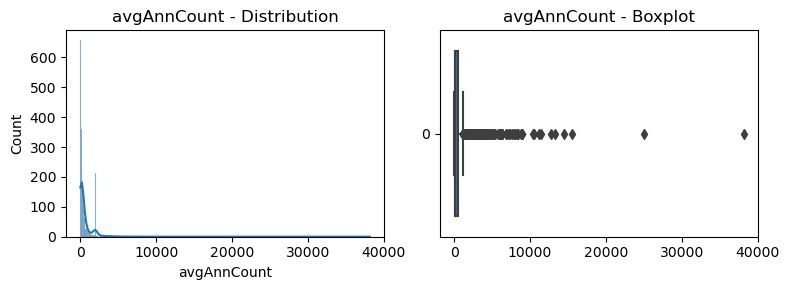

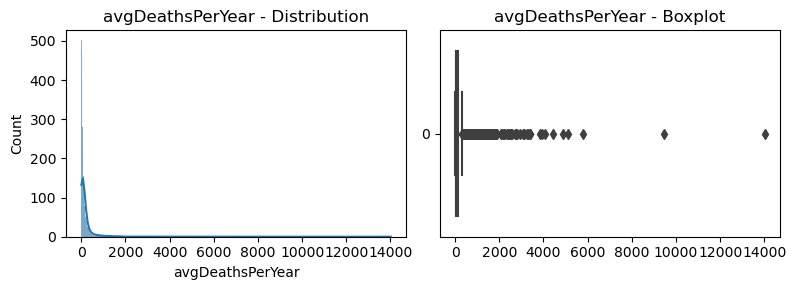

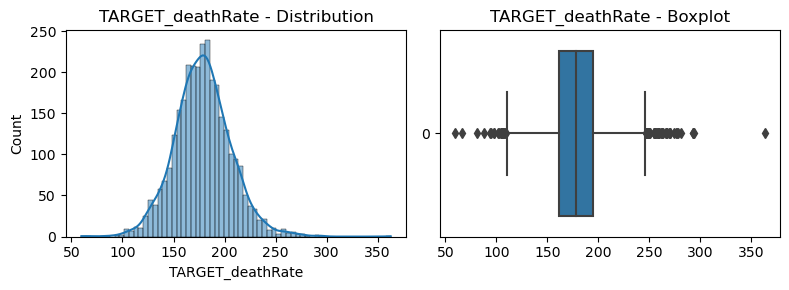

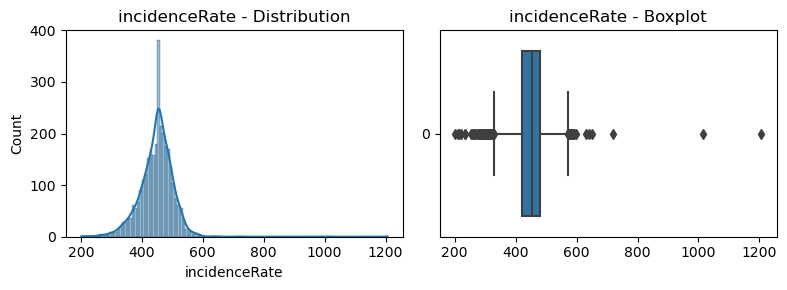

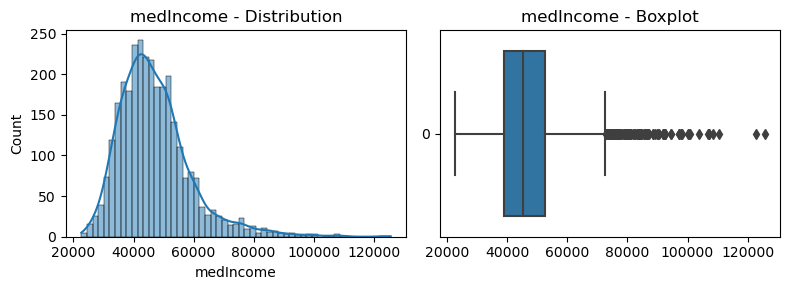

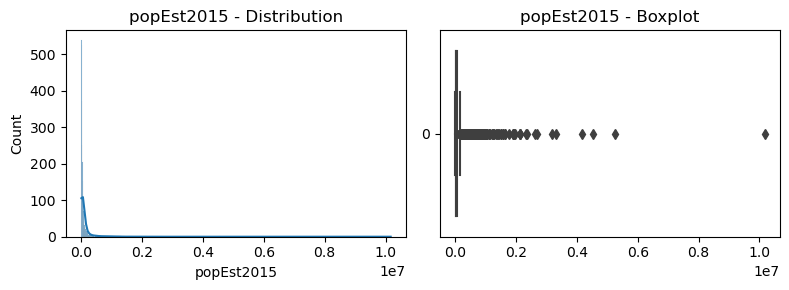

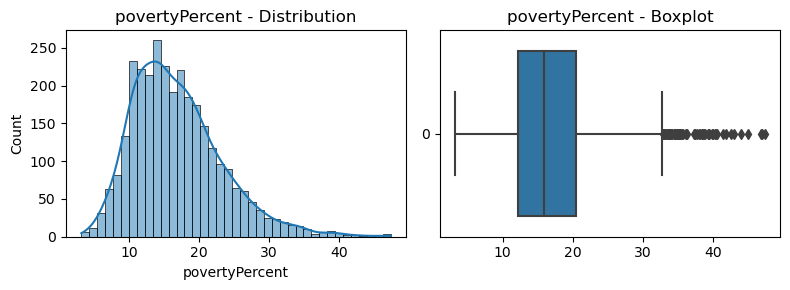

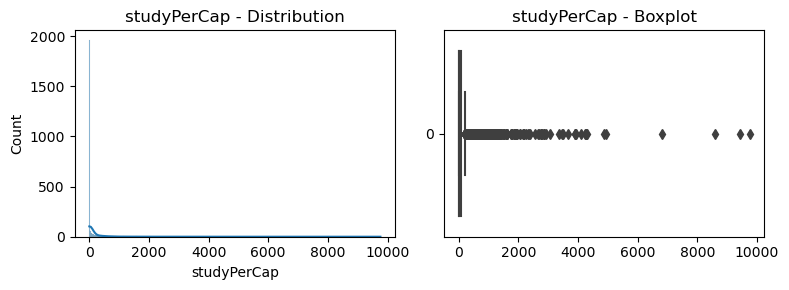

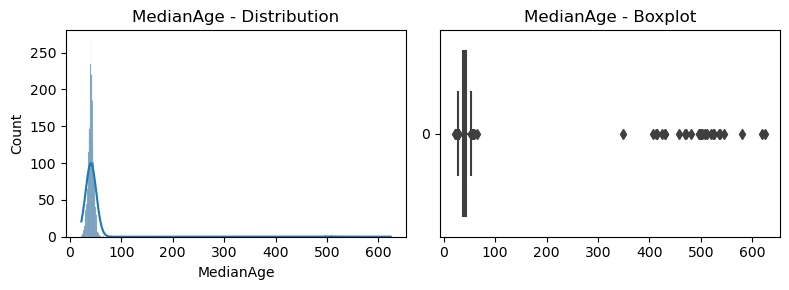

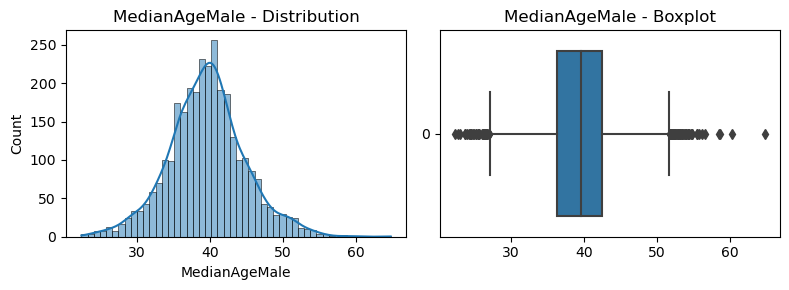

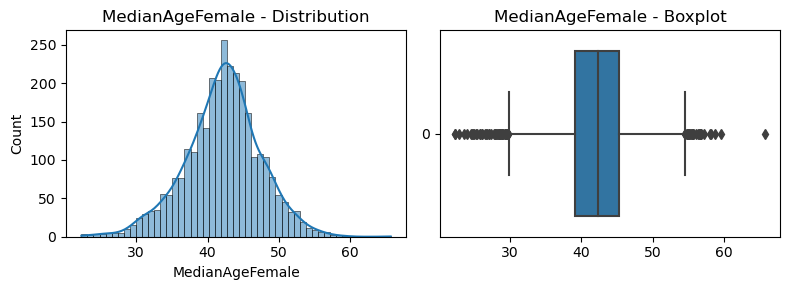

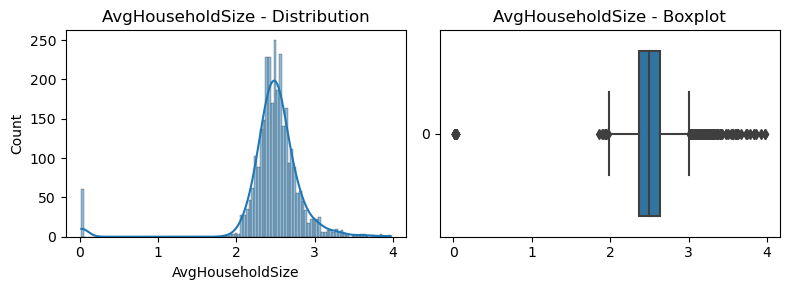

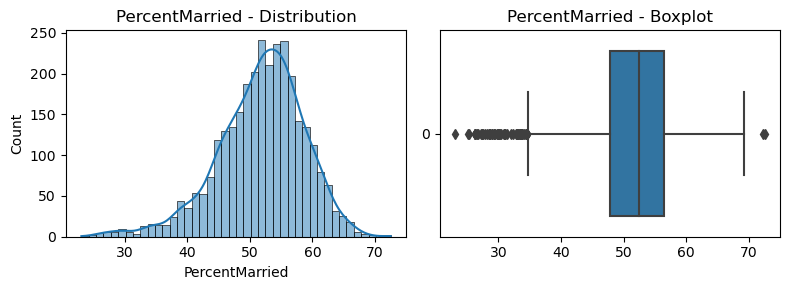

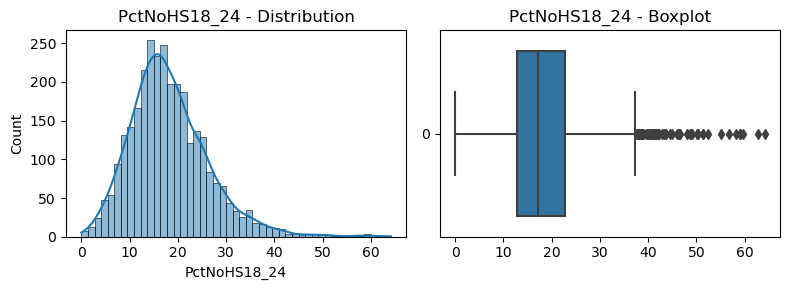

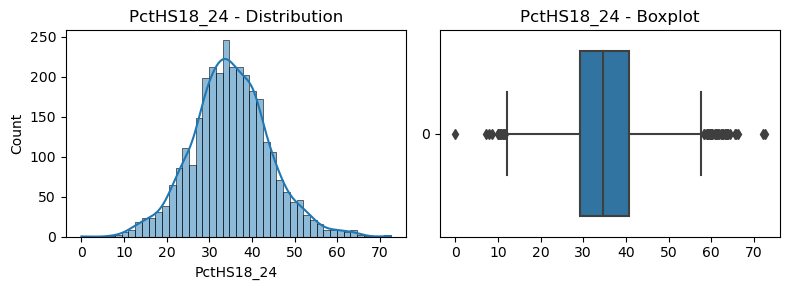

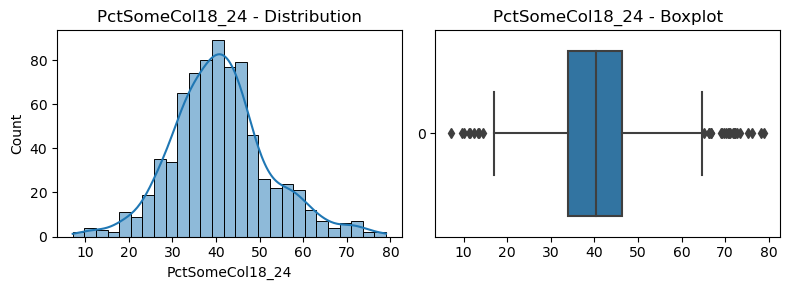

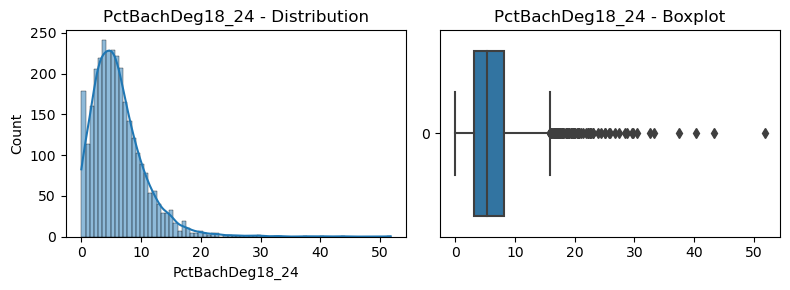

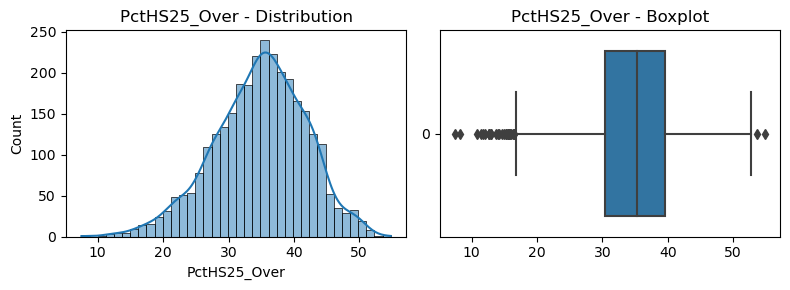

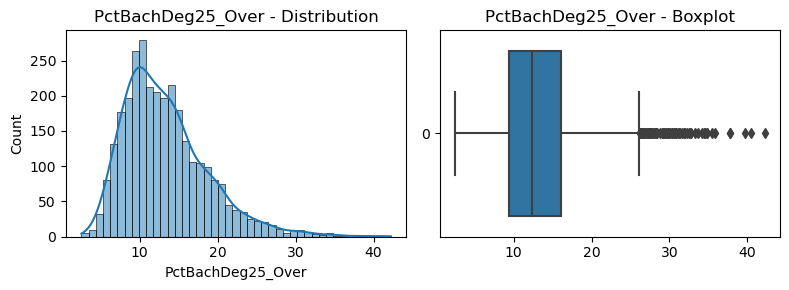

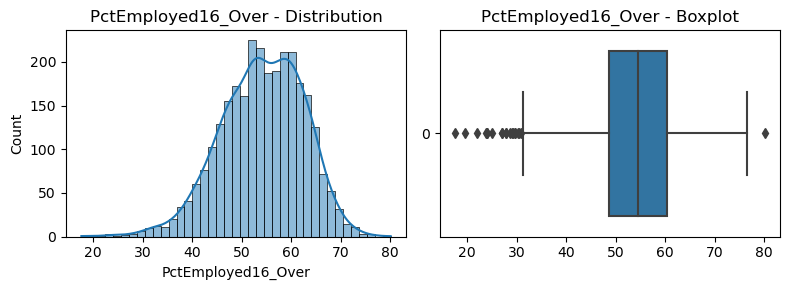

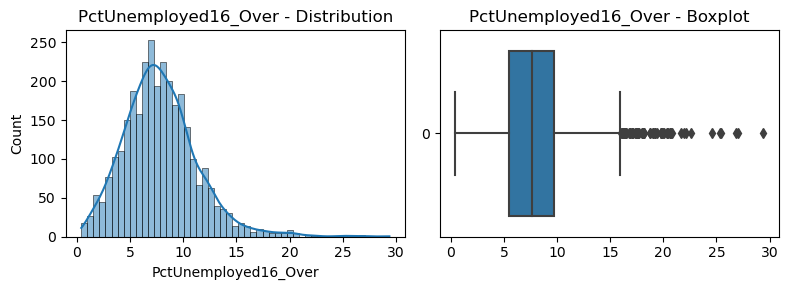

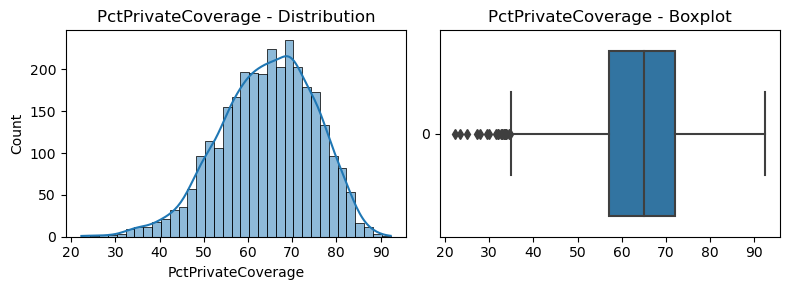

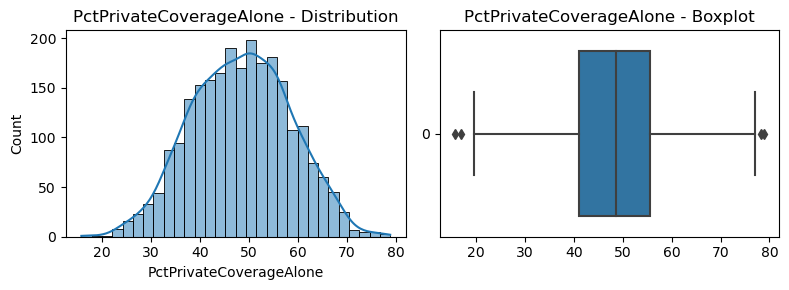

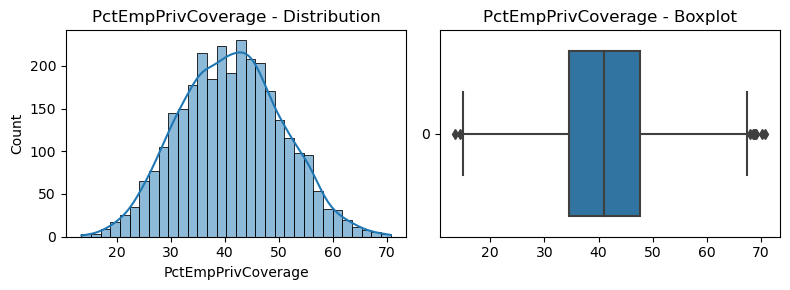

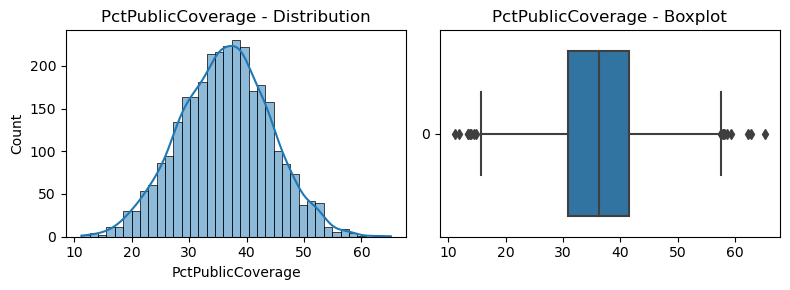

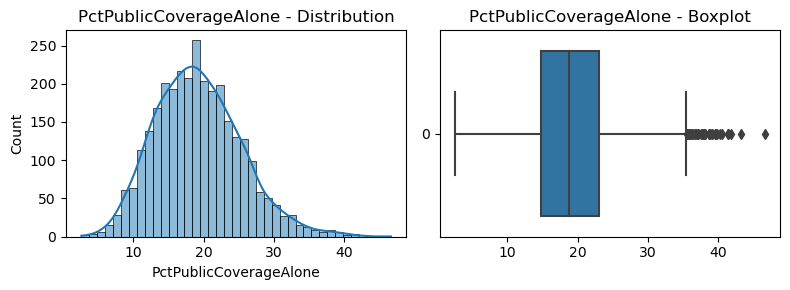

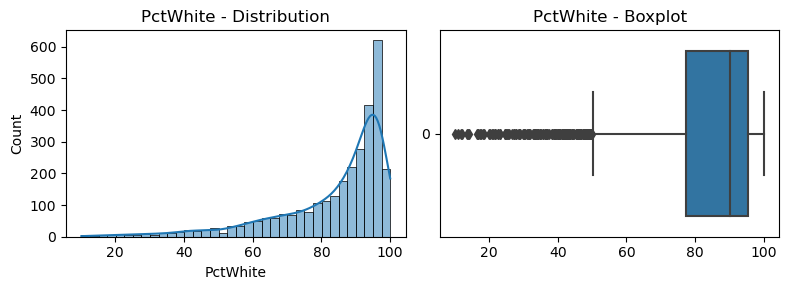

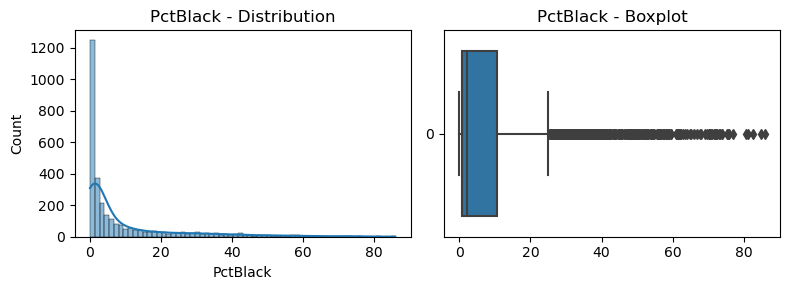

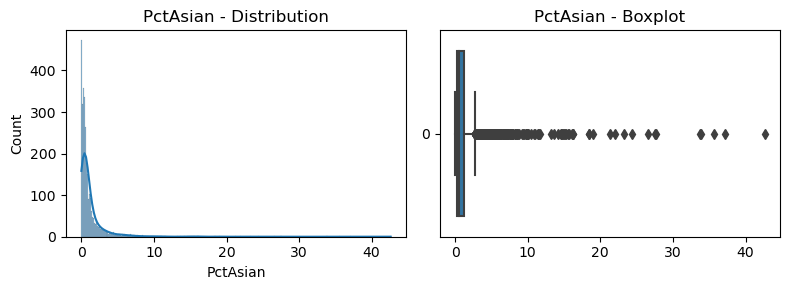

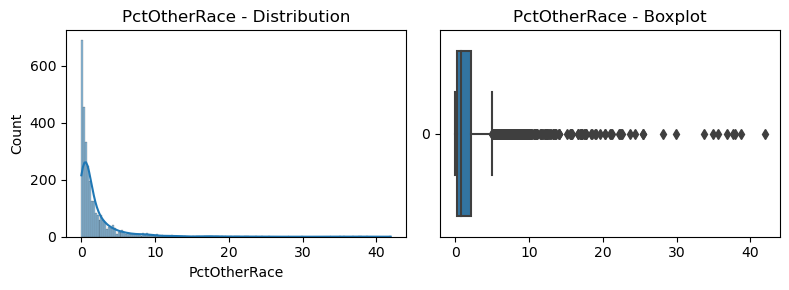

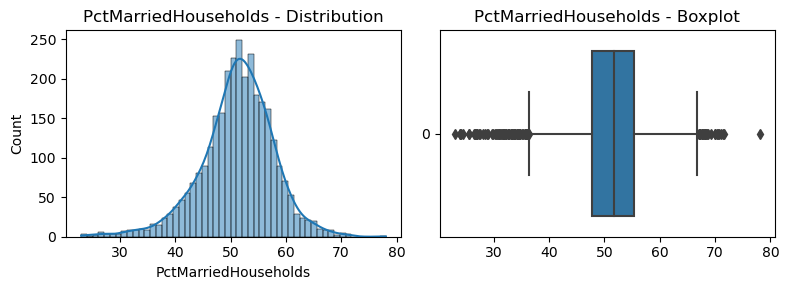

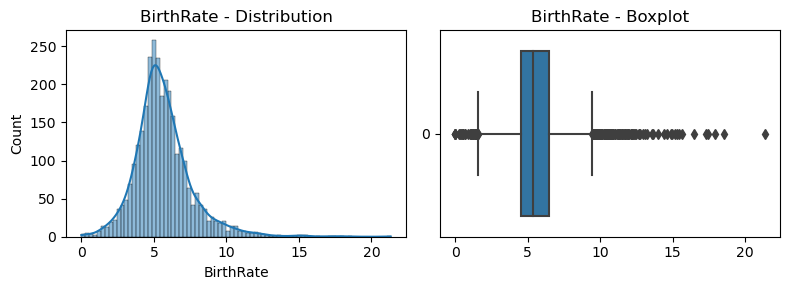

In [7]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

## Colclusion
* we having 32 diffrent features, each feature has 3047 
* We notice that there are some rows that having null values
* The columns with null values are:
  * PctSomeCol18_24    
  * PctEmployed16_Over       
  * PctPrivateCoverageAlone 

In [8]:
DF['City'] = DF['Geography'].str.split(',').str[1]
DF['District'] = DF['Geography'].str.split(',').str[0]

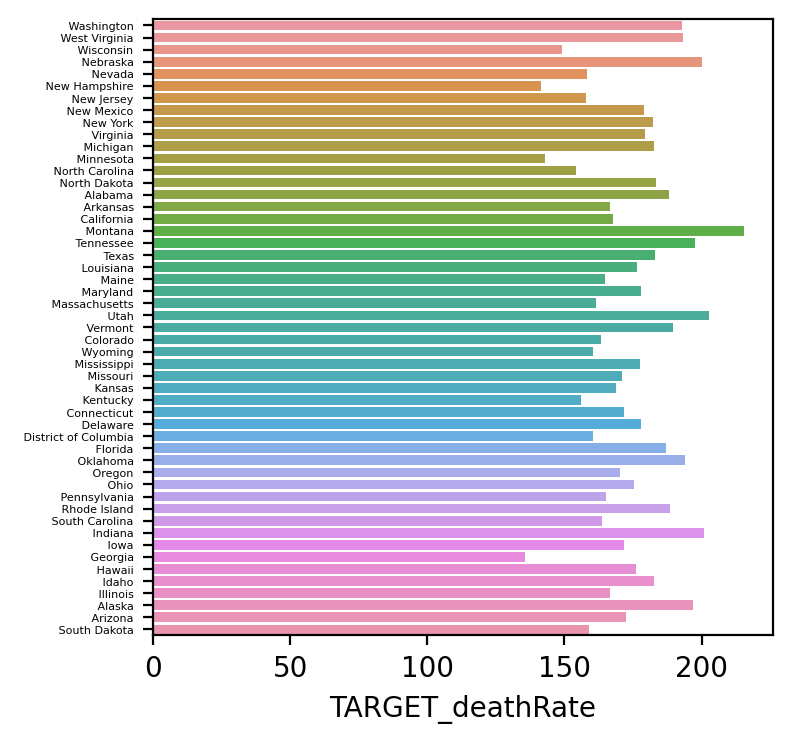

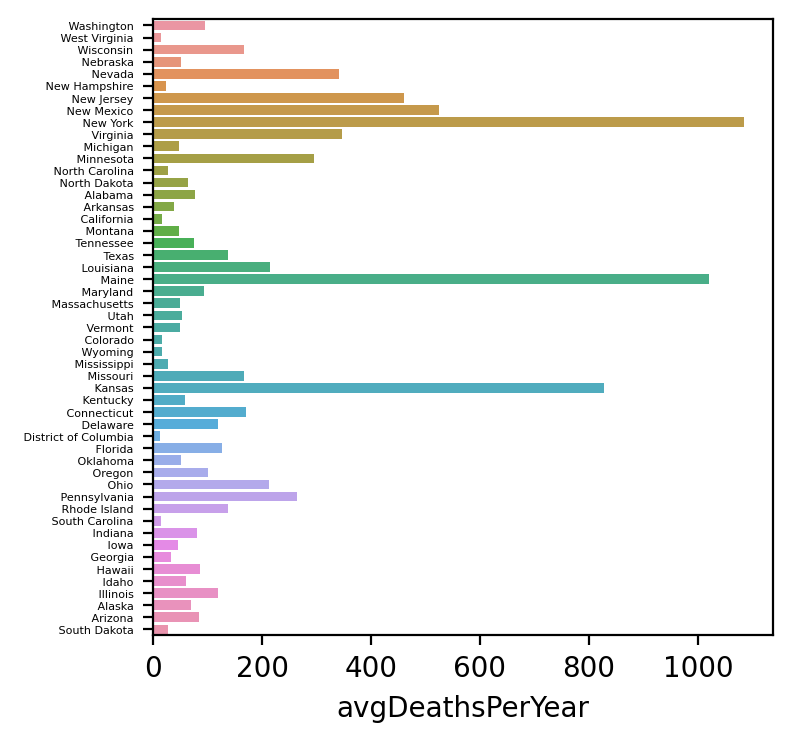

In [9]:
fig1 = plt.figure(figsize=(4, 4), dpi=200)
ax1 = sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['TARGET_deathRate'].mean()[:])
ax1.set_yticklabels(DF['City'].unique(), fontsize=4)
fig2 = plt.figure(figsize=(4, 4), dpi=200)
ax2 = sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['avgDeathsPerYear'].median()[:])
ax2.set_yticklabels(DF['City'].unique(), fontsize=4)
plt.show()

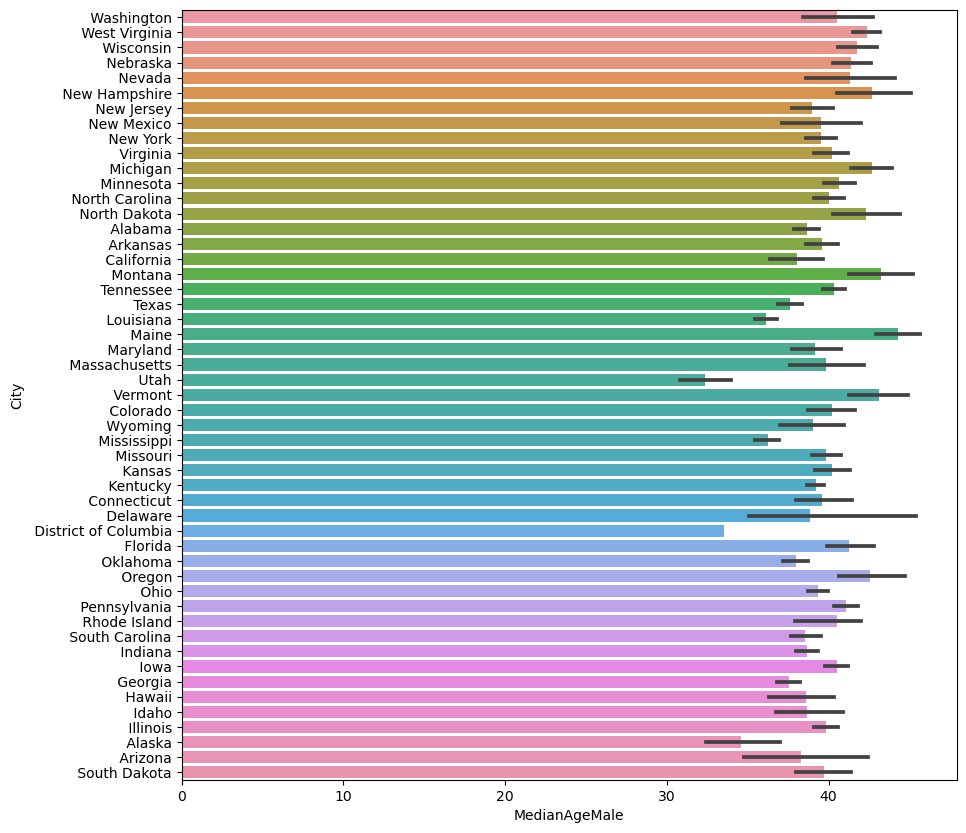

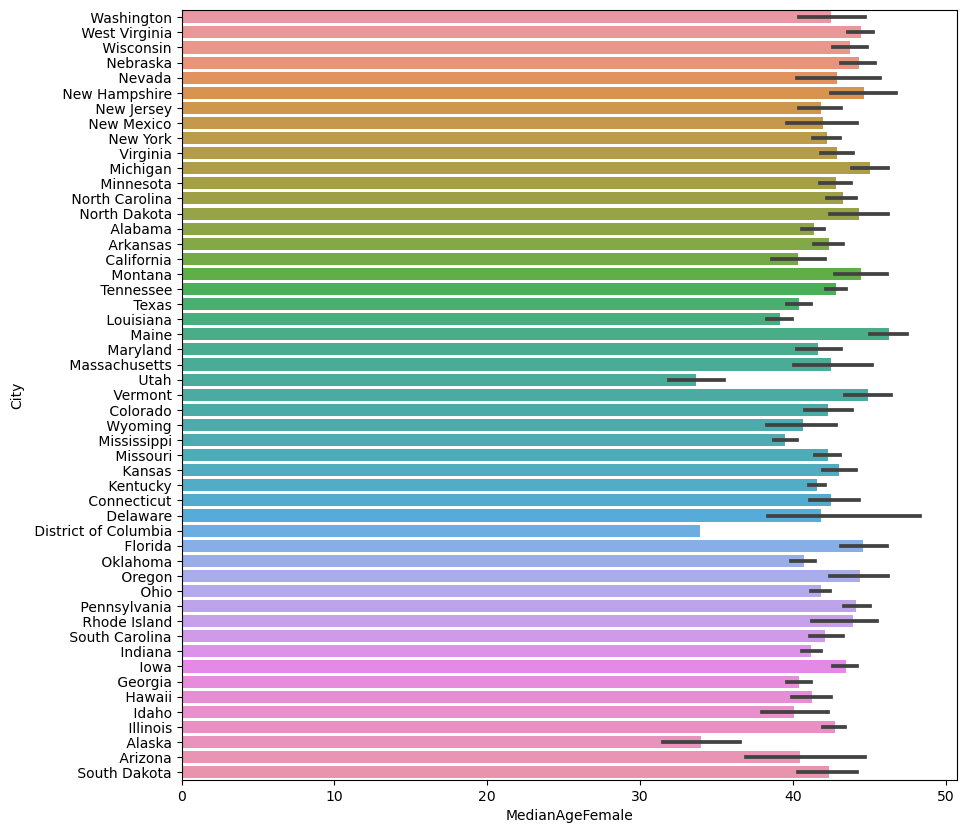

In [10]:
plt.figure(figsize=(10, 10))
sns.barplot(x = DF['MedianAgeMale'], y = DF['City'])
plt.show()

plt.figure(figsize=(10, 10))
sns.barplot(x = DF['MedianAgeFemale'], y = DF['City'])
plt.show()

# Data Cleaning

## Part1 : Handling missing values

1. Explore the columns that have null values 

2. Filling the null values with one of 4 ways:
    * Filling with zeros
    * Filling with columns mean
    * Forward filling 
    * Deleting/Dropping rows with null values

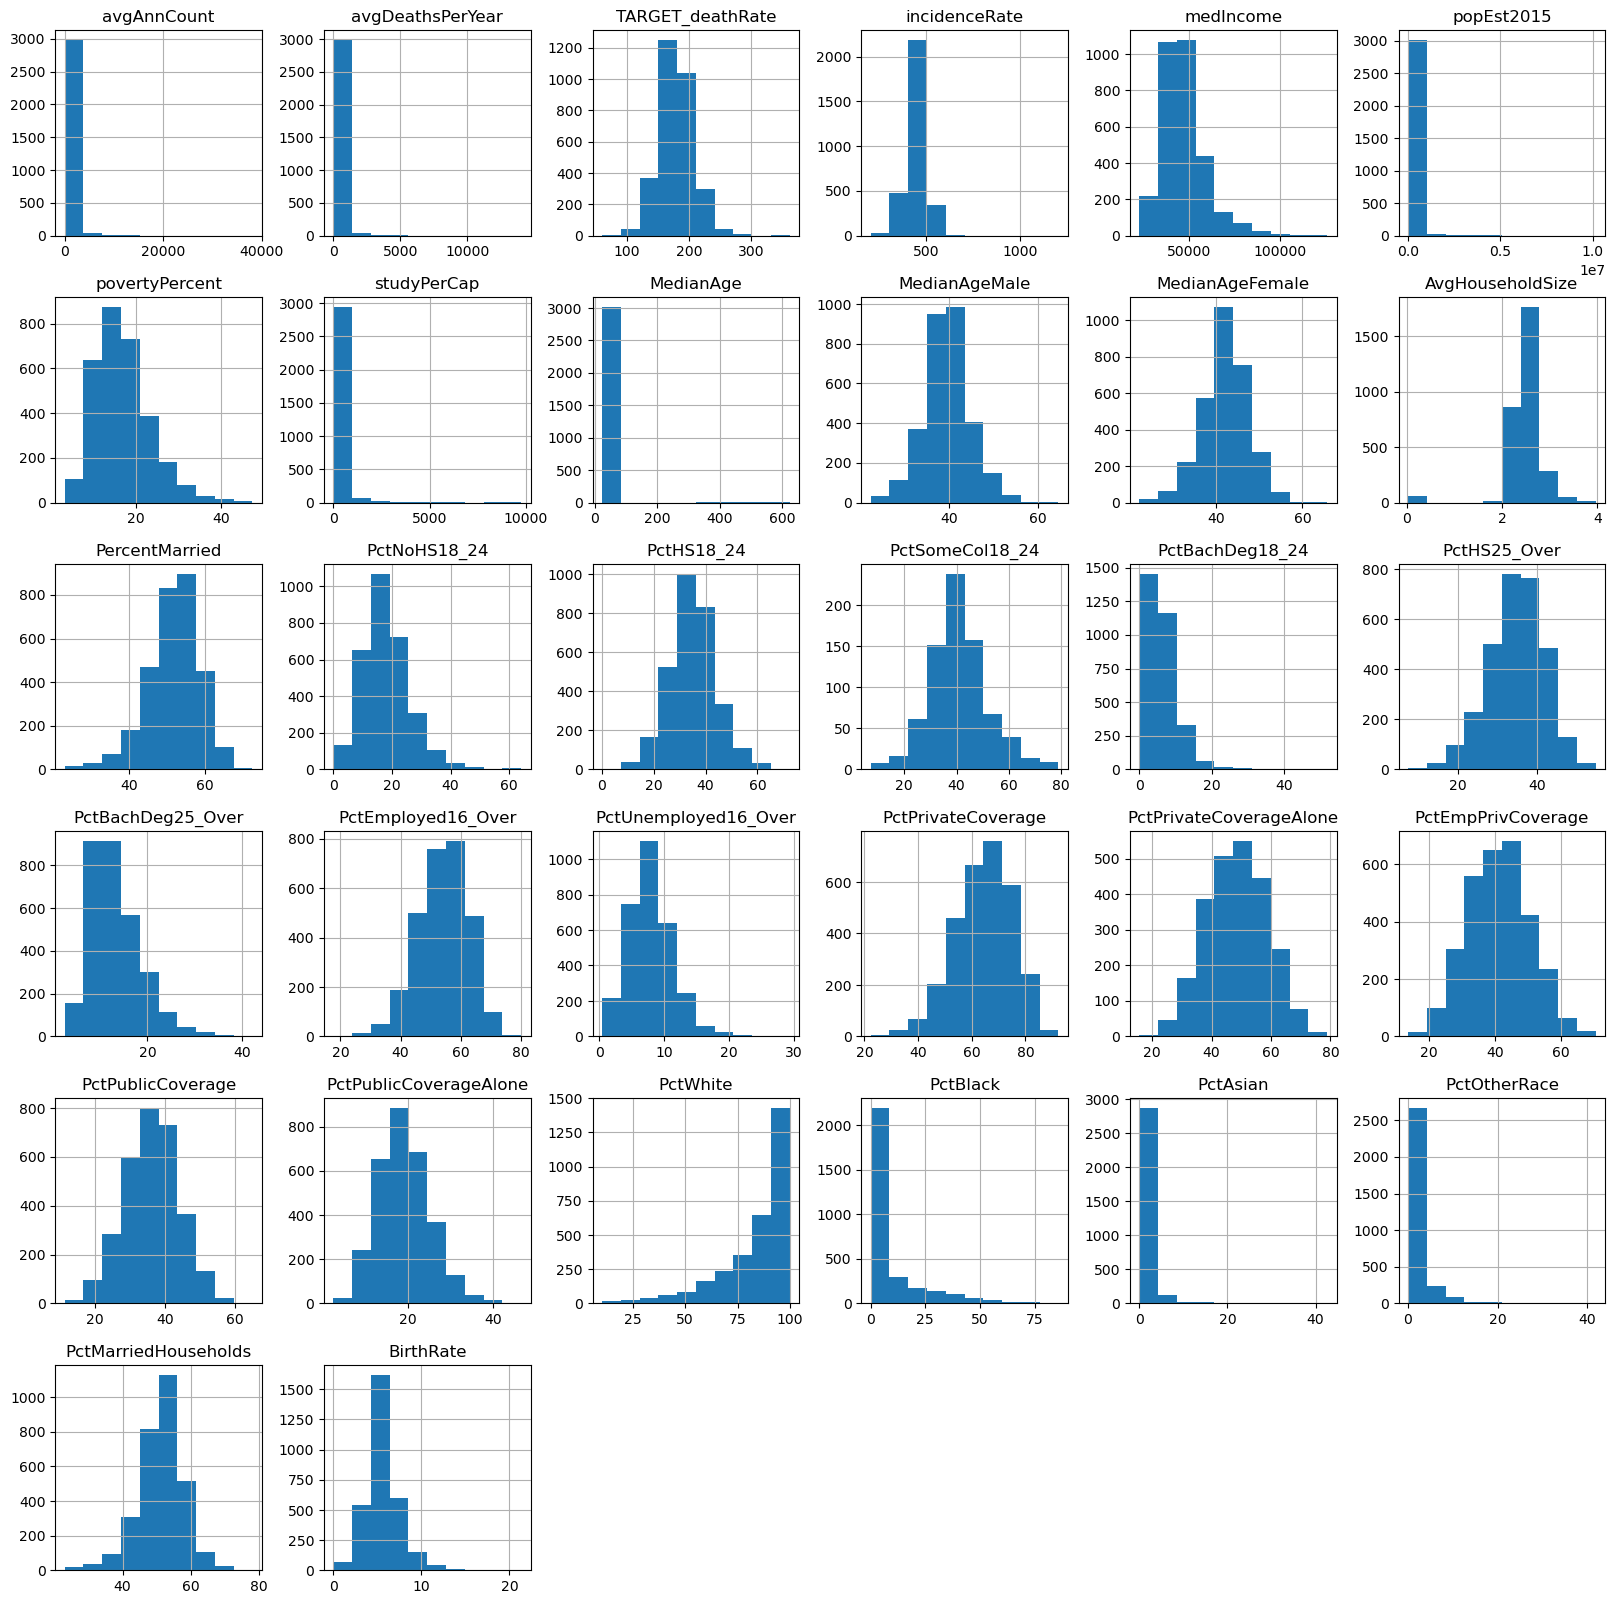

In [11]:
 # Ploting histogram for each column before filling the null data
DF.hist(figsize=(20,20))
plt.show()

### Chosing best filling null values approach

#### Ploting without filling 

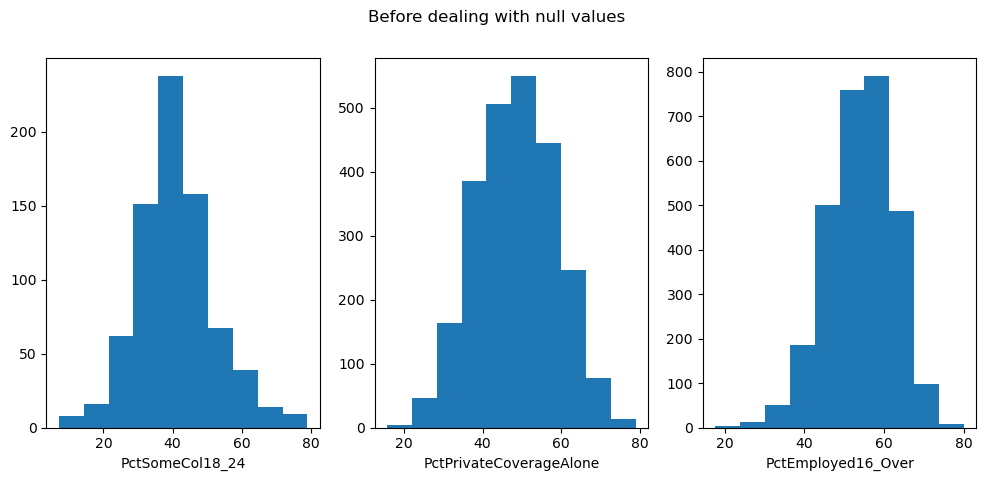

In [12]:
#ploting the 3 columns which contains null values
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("Before dealing with null values")
ax[0].hist(DF['PctSomeCol18_24'])
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'])
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'])
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

#### Filling with 0s

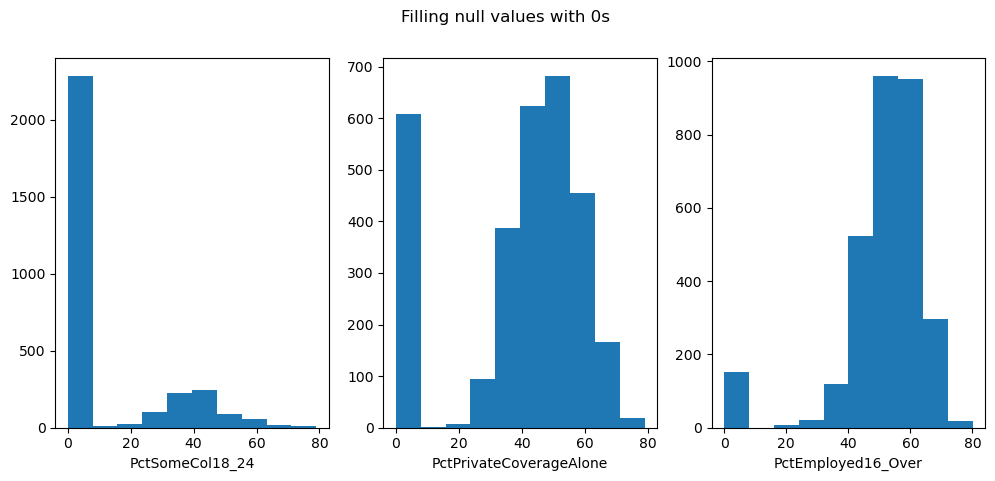

In [13]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("Filling null values with 0s")
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(0)) #fillna(value) : function in pandas is used to fill null values with its given attributs 
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(0))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(0))
ax[2].set_xlabel('PctEmployed16_Over')
fig.set_label('fill non values with 0s')
plt.show()

#### Filling with column mean

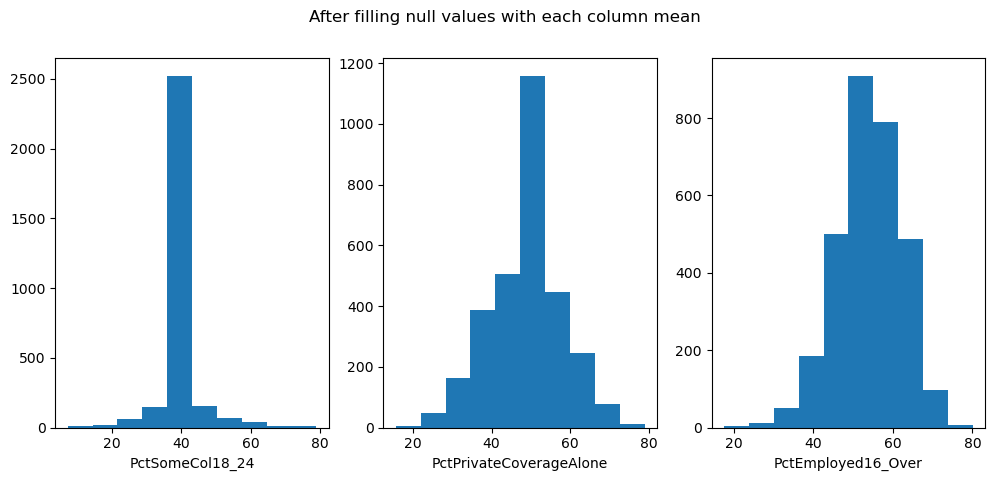

In [14]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("After filling null values with each column mean")
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(DF['PctSomeCol18_24'].mean()))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(DF['PctPrivateCoverageAlone'].mean()))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(DF['PctEmployed16_Over'].mean()))
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

#### Forward Filling

##### The fill-forward approach, also known as forward filling, is a method used in data cleaning and preprocessing to handle missing values in a dataset. This approach involves replacing missing values with the most recent known value in the dataset.

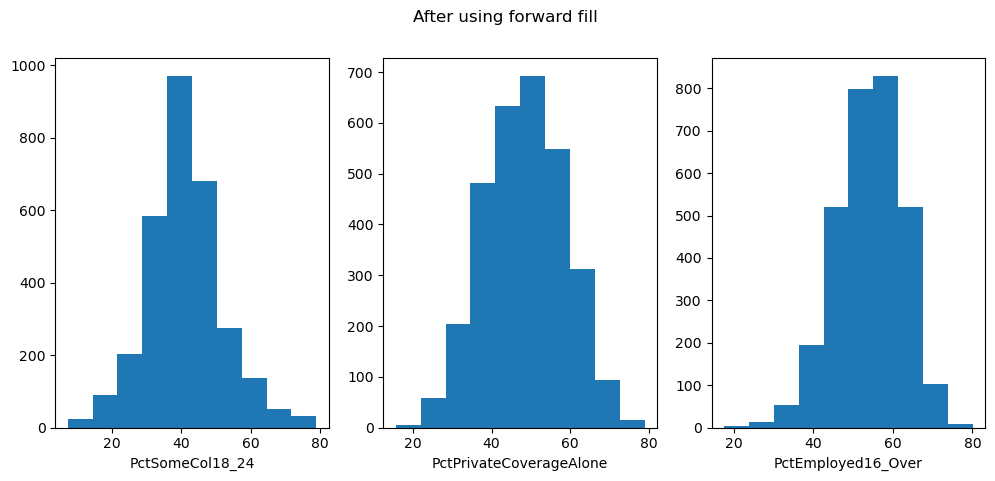

In [15]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("After using forward fill")
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(DF['PctSomeCol18_24'].ffill())) #ffill is pandas function to apply Forward Filling
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(DF['PctPrivateCoverageAlone'].ffill()))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(DF['PctEmployed16_Over'].ffill()))
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

#### Dropping null values

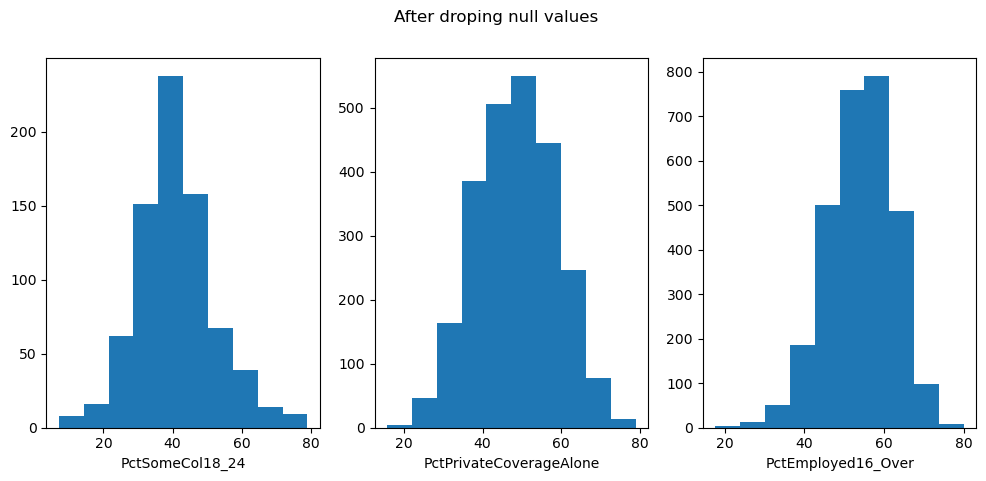

In [16]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
fig.suptitle("After droping null values")
ax[0].hist(DF['PctSomeCol18_24'].dropna()) # dropna() is pandas function applied to data frame to delete rows with null values
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].dropna())
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].dropna())
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

#### Conclusion

Best approach is to use forward fill method as it's Suitable for intermittent missing data. Forward filling is particularly useful when dealing with intermittent missing data, where missing values occur sporadically. It provides a simple way to fill in the gaps without introducing additional complexity or assumptions about the missing data.

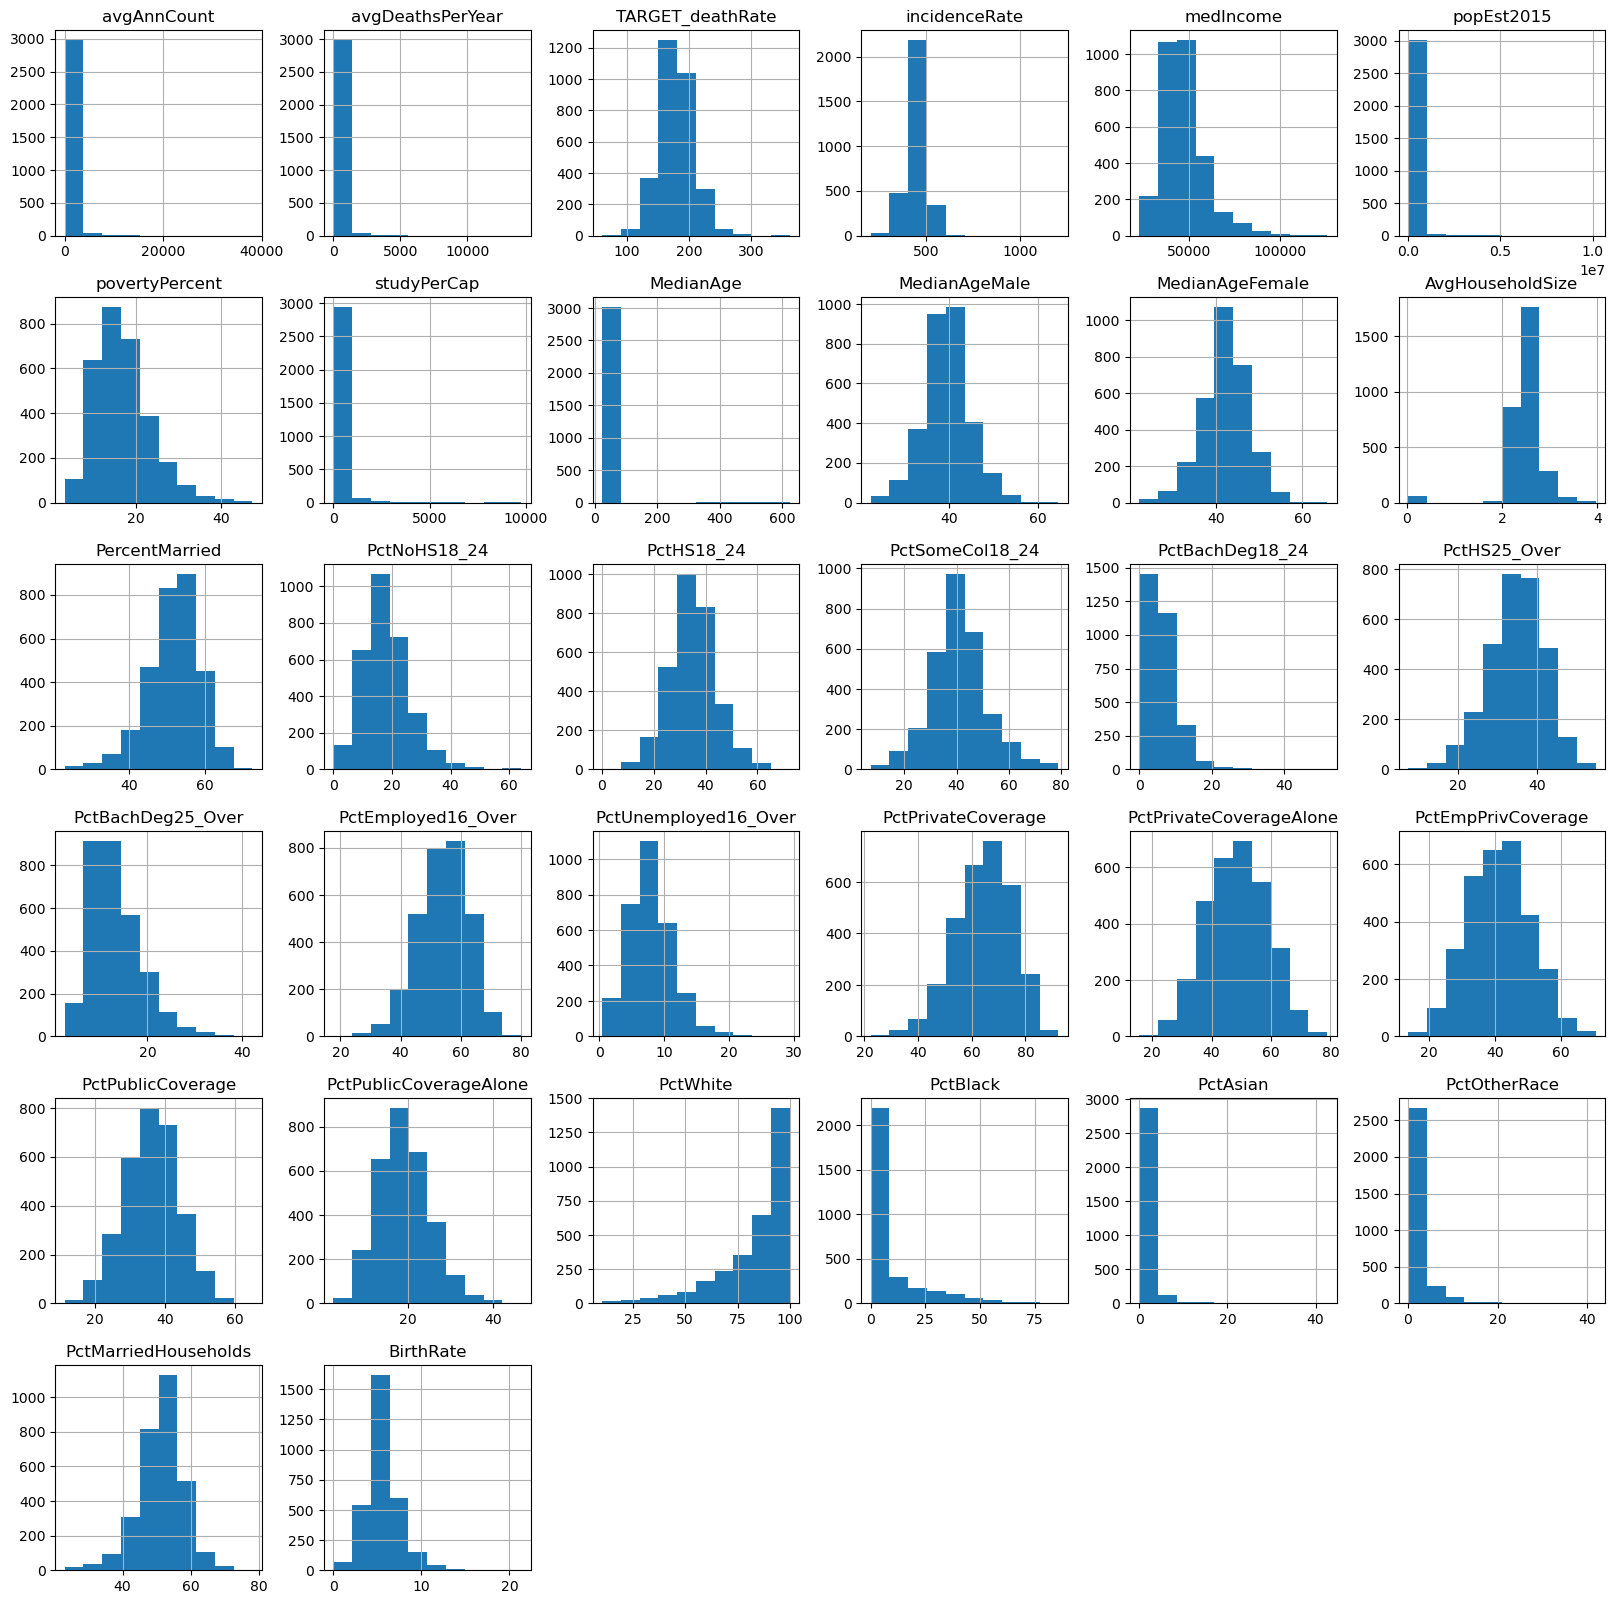

In [17]:
# Appling forward filling to null columns 
DF["PctSomeCol18_24"] = DF["PctSomeCol18_24"].ffill()
DF["PctEmployed16_Over"] = DF["PctEmployed16_Over"].ffill()
DF['PctPrivateCoverageAlone'] = DF['PctPrivateCoverageAlone'].ffill()
DF.hist(figsize=(20,20))
plt.show()

#### Showing info after using FF approach

In [18]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

## Part2 : Dealing with outliers 


### Data Visualization

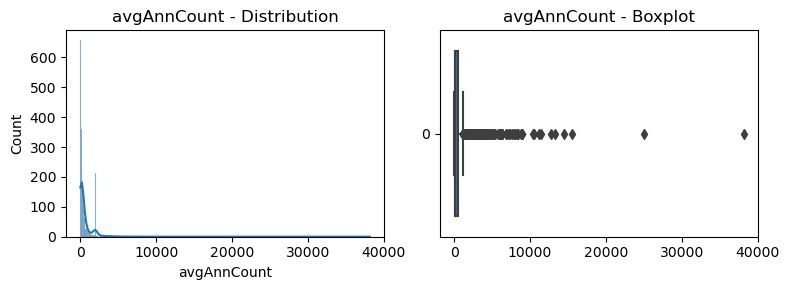

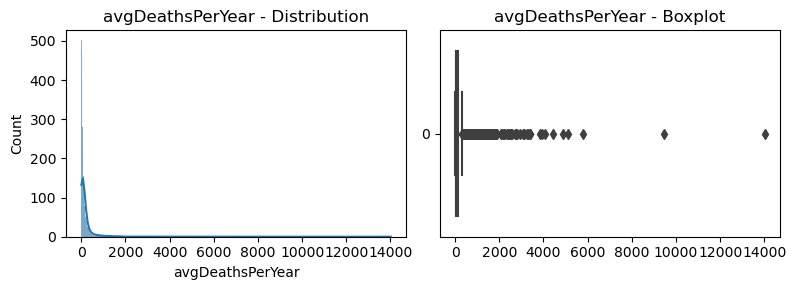

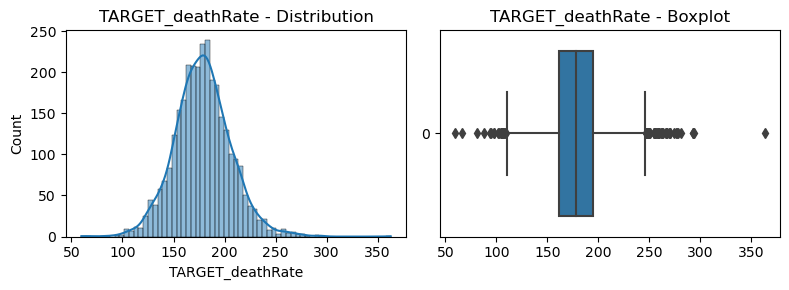

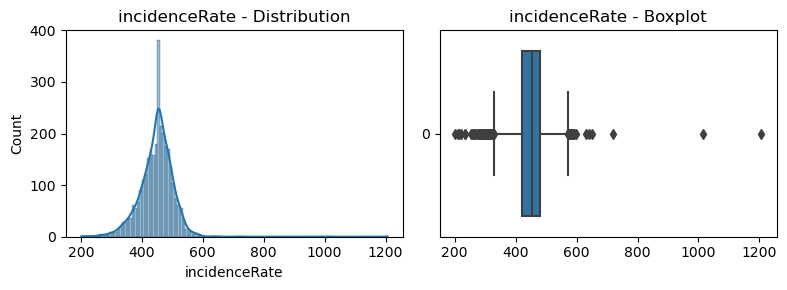

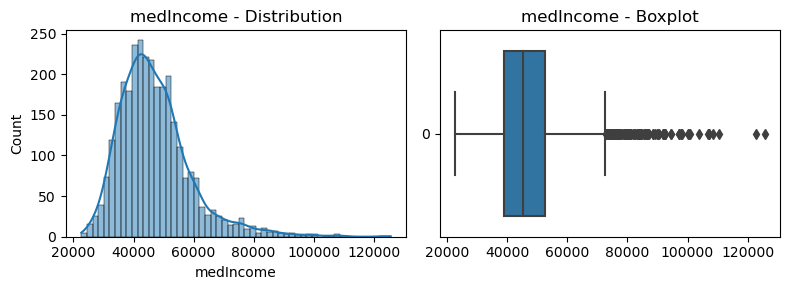

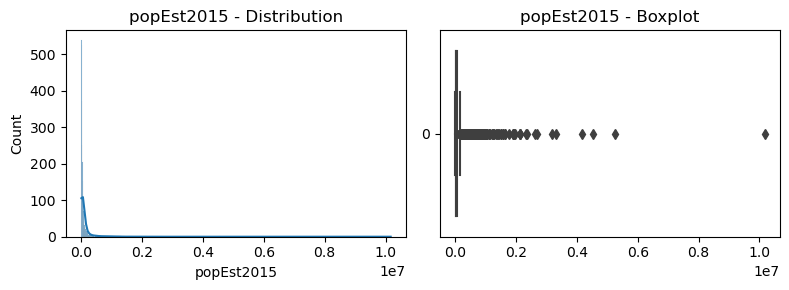

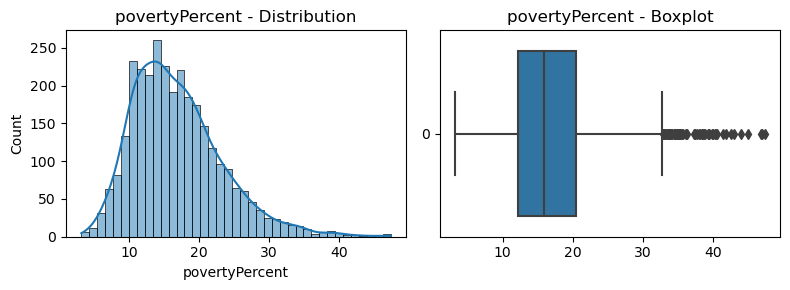

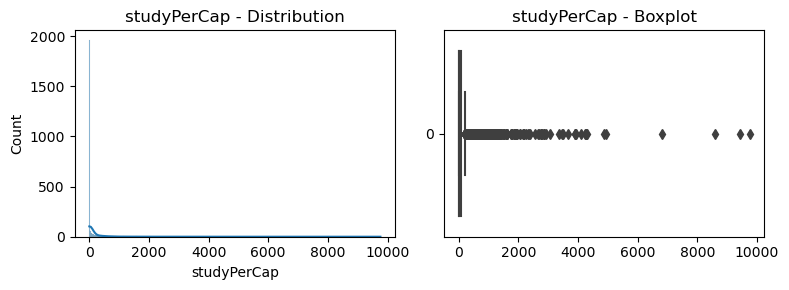

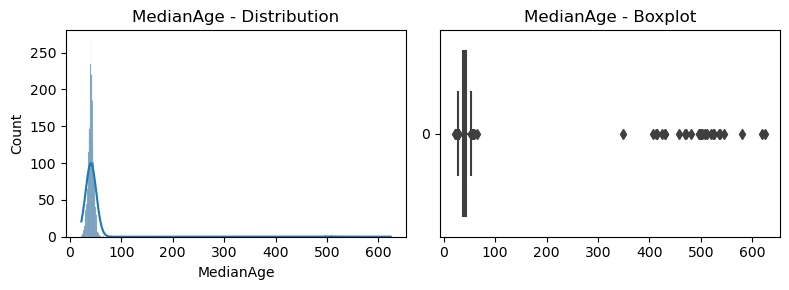

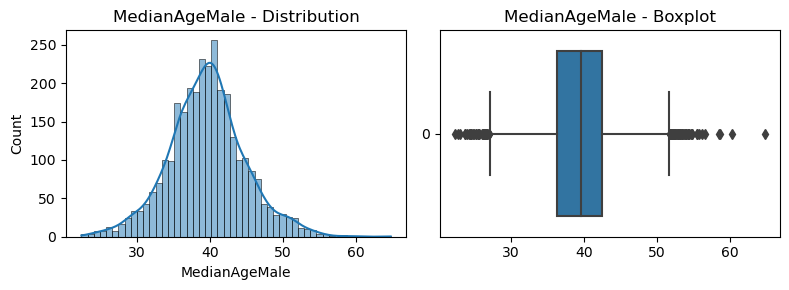

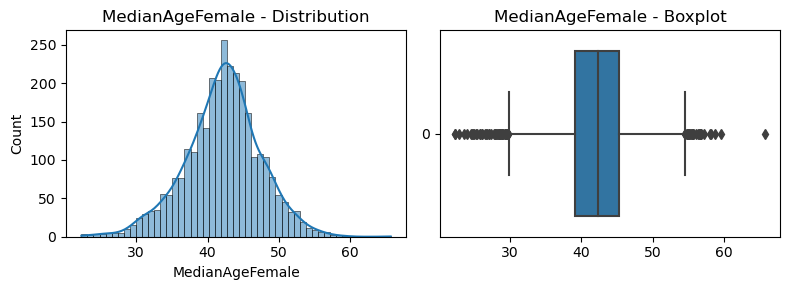

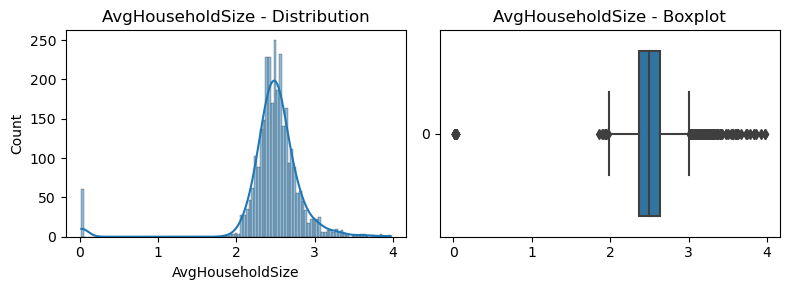

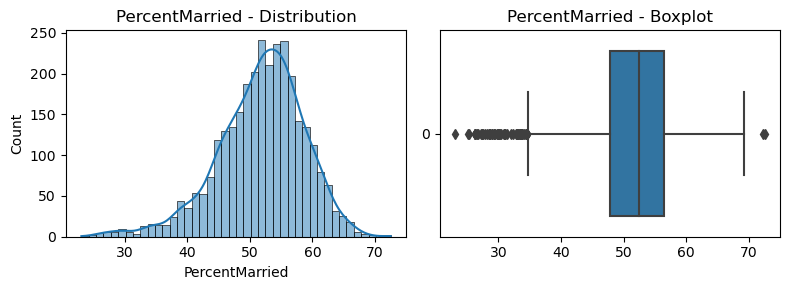

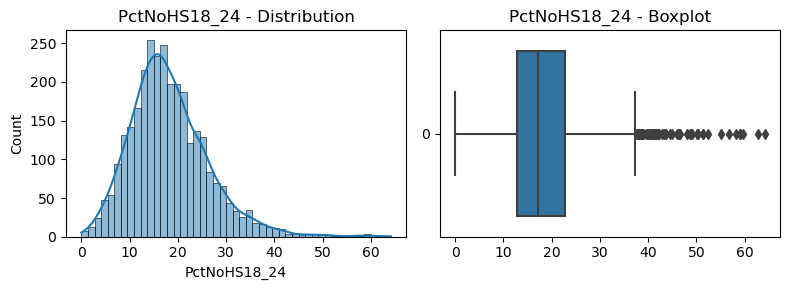

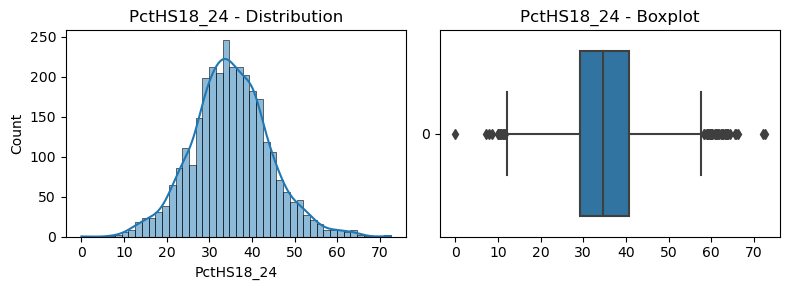

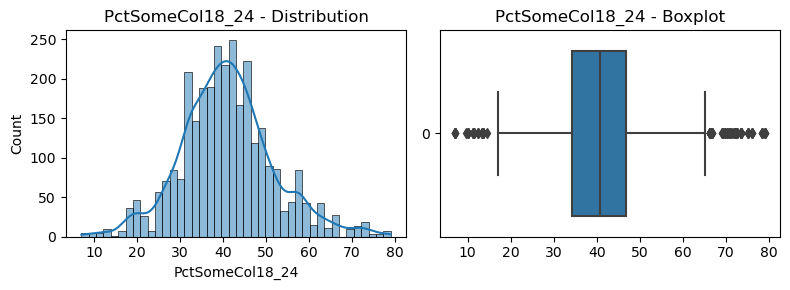

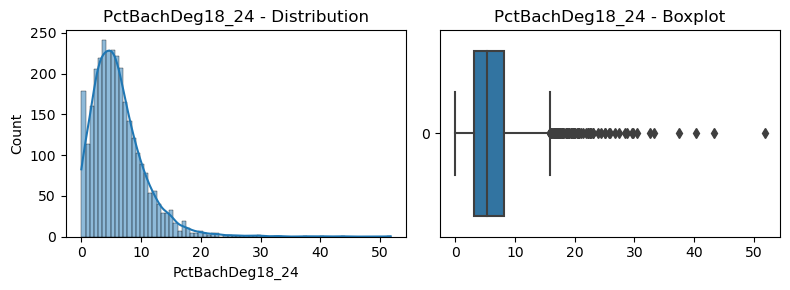

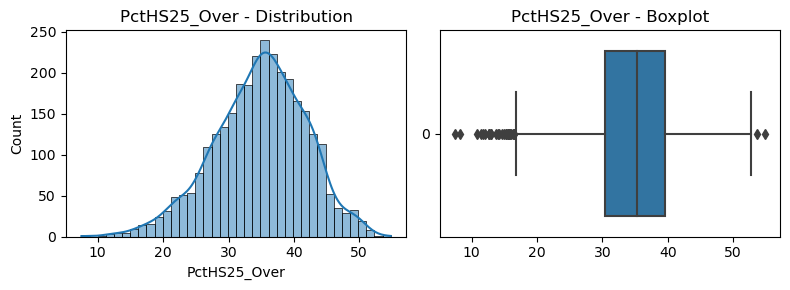

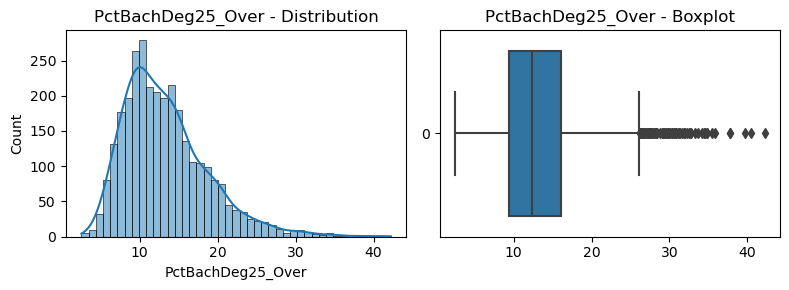

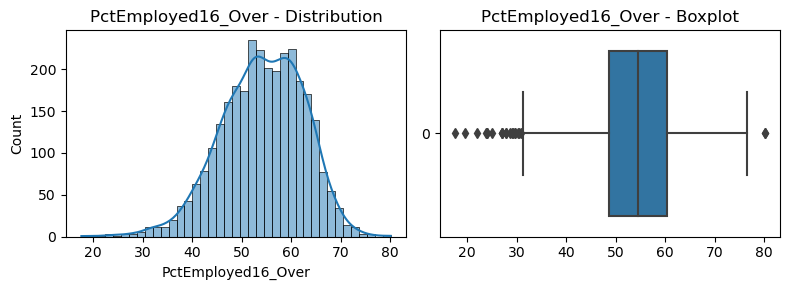

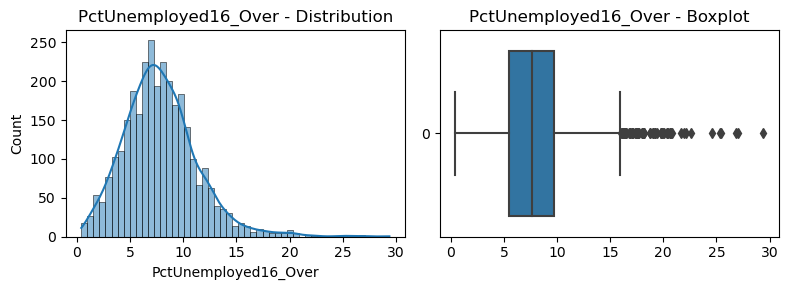

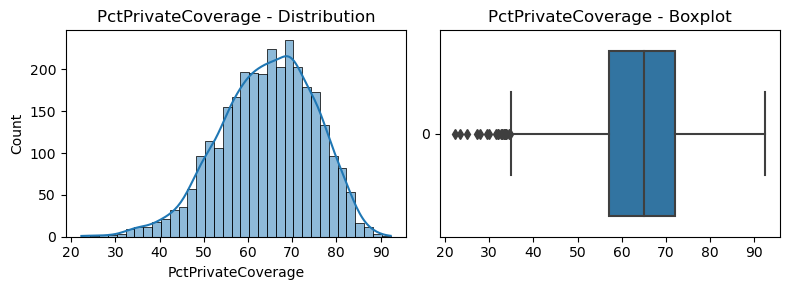

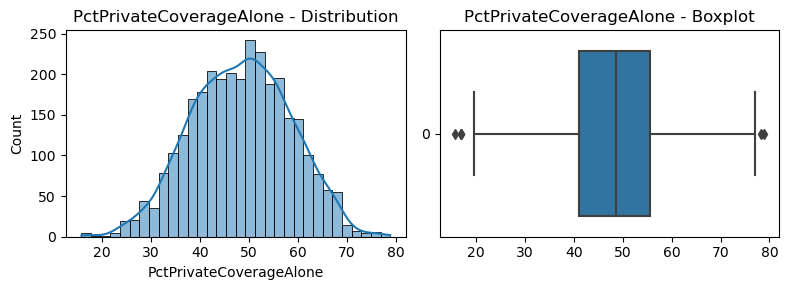

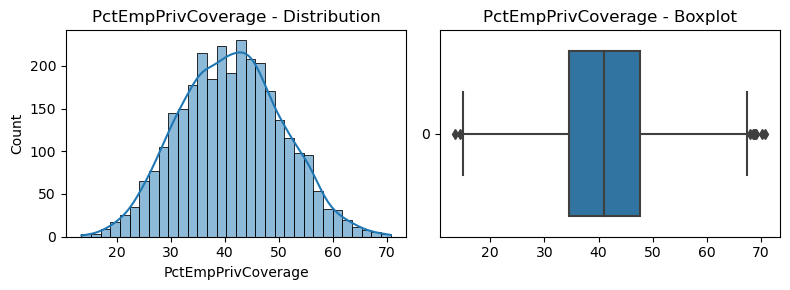

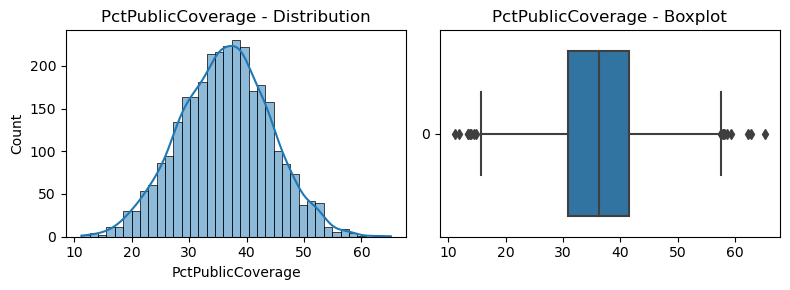

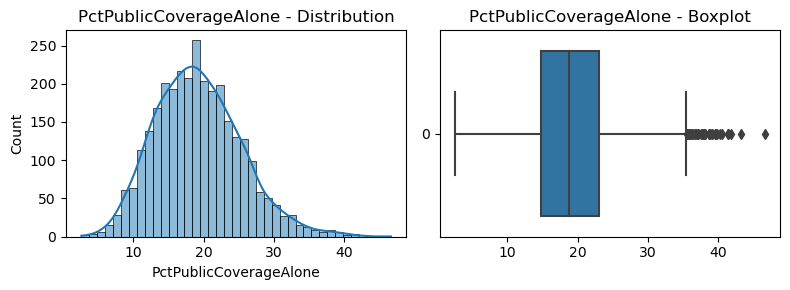

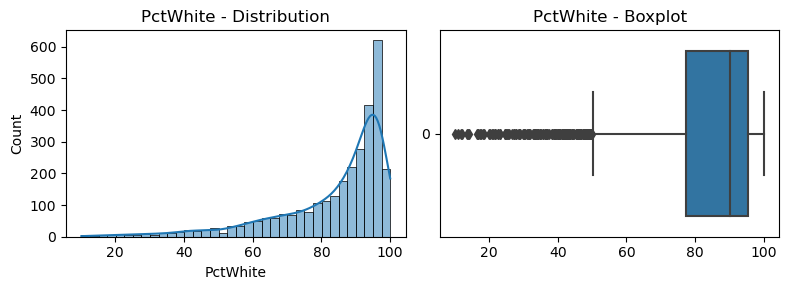

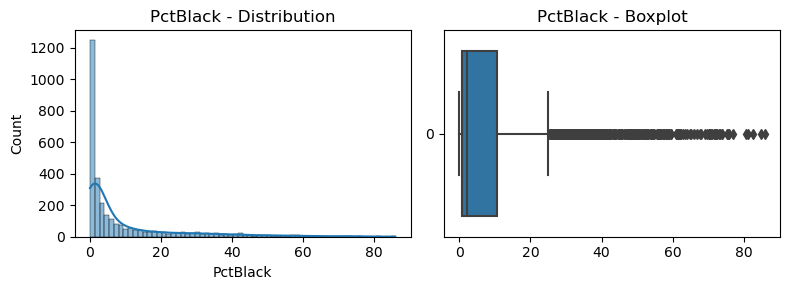

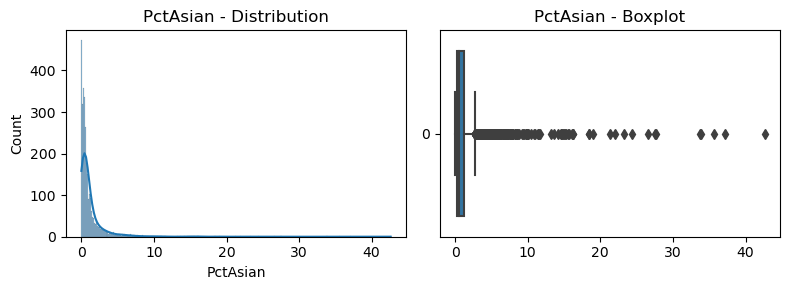

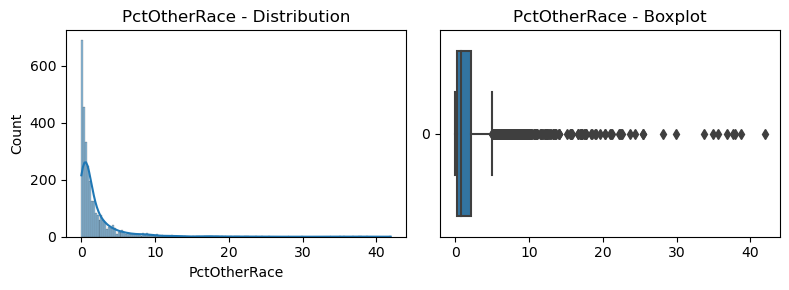

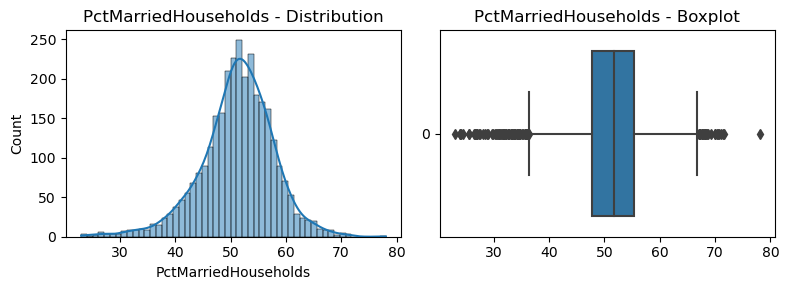

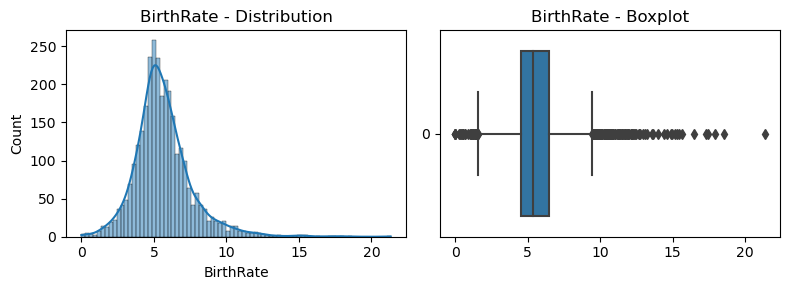

In [19]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

### Removing Outliers

From the plotting we can see that there are outliers in our data
we can do so using 2 ways 
* Interquartile range 
* Z-score 
### We will use Interquartile range

#### Interquartile range 
To apply the Interquartile Range (IQR) method for removing outliers, the following equations are used:

1. Calculate the first quartile (Q1) and the third quartile (Q3):

$$
Q1 = \text{25th percentile}
$$
$$
Q3 = \text{75th percentile}
$$

2. Compute the IQR:

$$
\text{IQR} = Q3 - Q1
$$

3. Define the lower threshold (LT) and the upper threshold (UT):

$$
\text{LT} = Q1 - (1.5 \times \text{IQR})
$$
$$
\text{UT} = Q3 + (1.5 \times \text{IQR})
$$

4. Identify outliers:

Any data point below the lower threshold (LT) or above the upper threshold (UT) is considered an outlier.

5. Remove outliers:

Exclude the identified outliers from the dataset before further analysis or modeling.

Note: The multiplier 1.5 is commonly used, but it can be adjusted based on the specific needs and characteristics of the dataset.


In [20]:
for i in DF.columns:
    if i == 'binnedInc' or i =='City' or i == 'Geography' or i == 'District' or i == 'studyPerCap' or i == 'popEst2015' or i == 'PctPrivateCoverageAlone':
        continue
    Q1 = np.percentile(DF[f"{i}"], 25, method='midpoint') # Function in numpy used to get quartile
    Q2 = np.percentile(DF[f"{i}"], 50, method='midpoint')
    Q3 = np.percentile(DF[f"{i}"], 75, method='midpoint')
    iqr = Q3-Q1  
    DF[f"{i}"] = DF[f"{i}"][(DF[f"{i}"]<(Q3+1.5*iqr)) & (DF[f"{i}"]>(Q1-1.5*iqr))]

#### Visualizatin after removing outliers

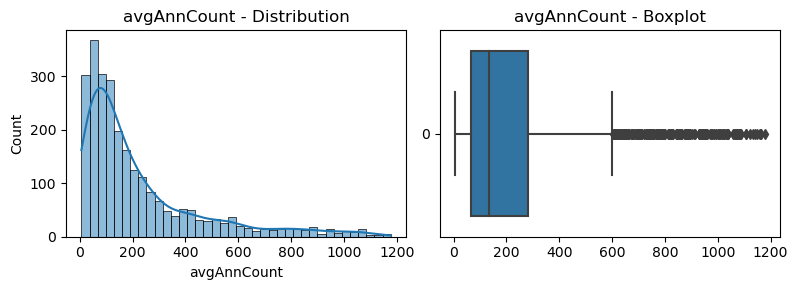

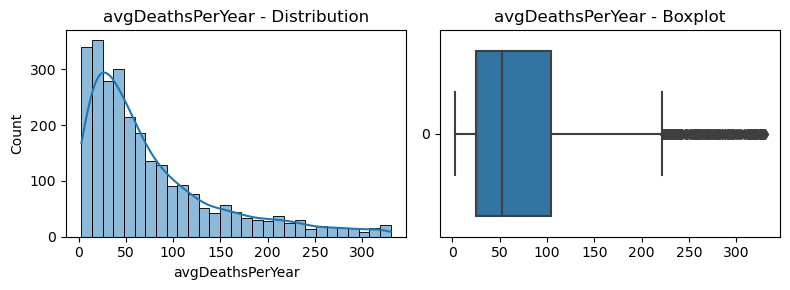

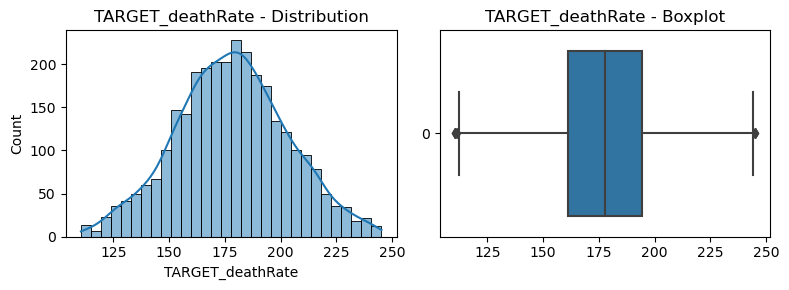

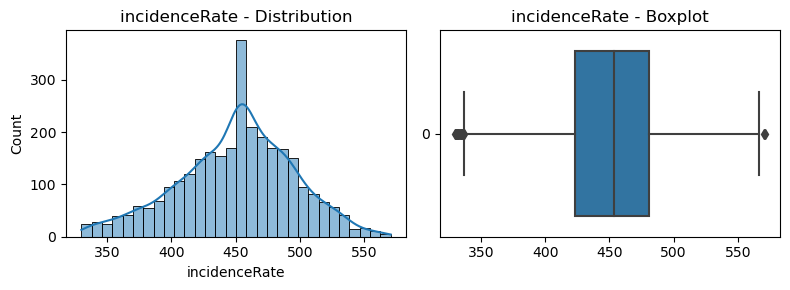

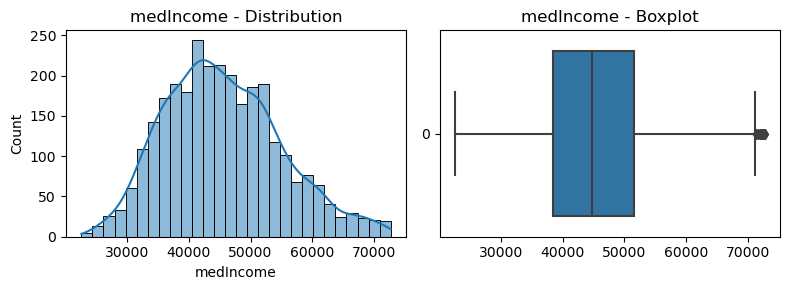

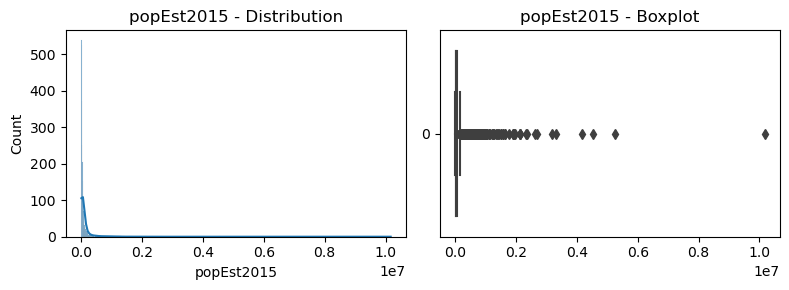

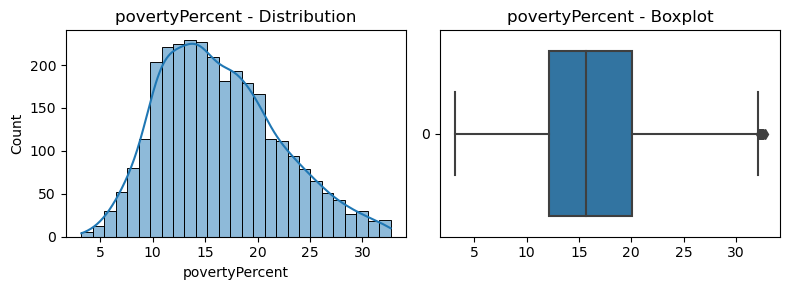

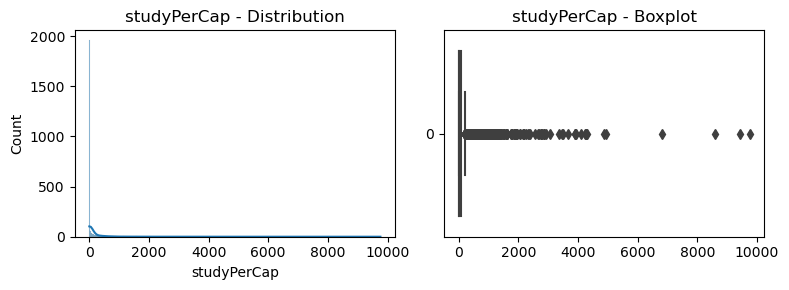

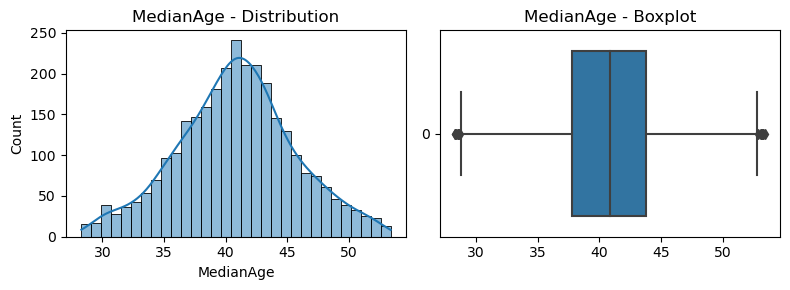

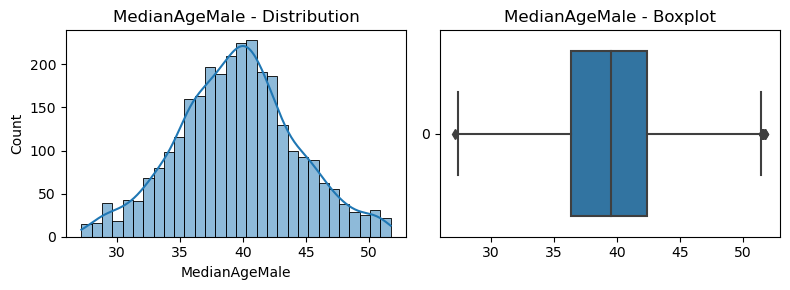

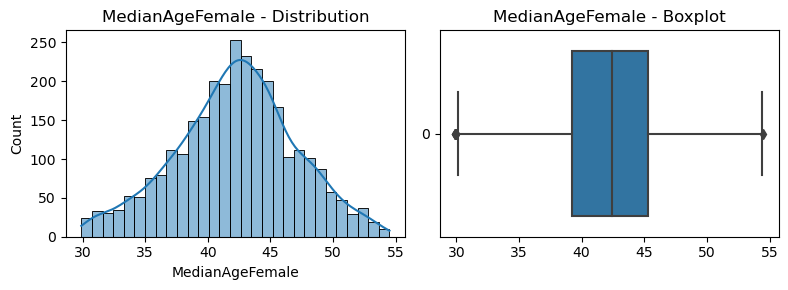

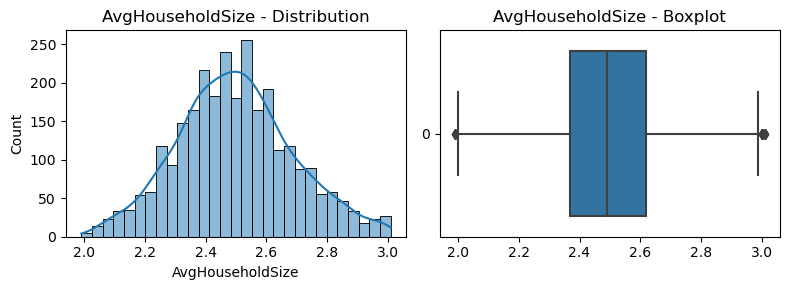

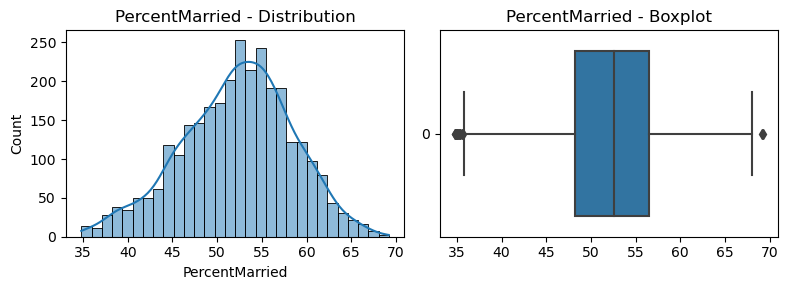

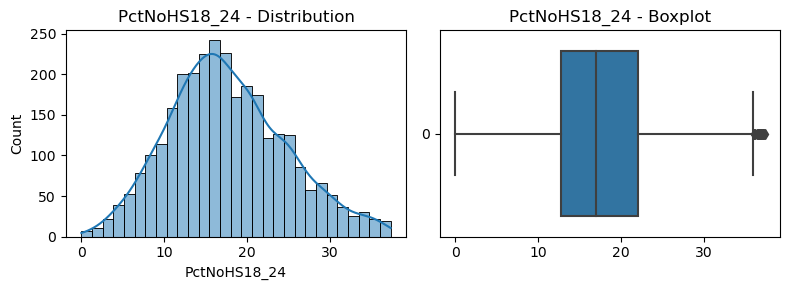

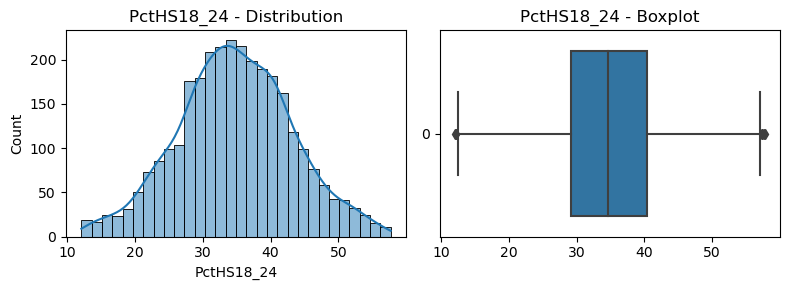

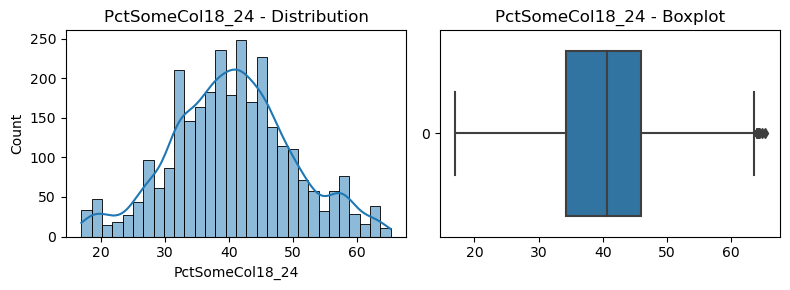

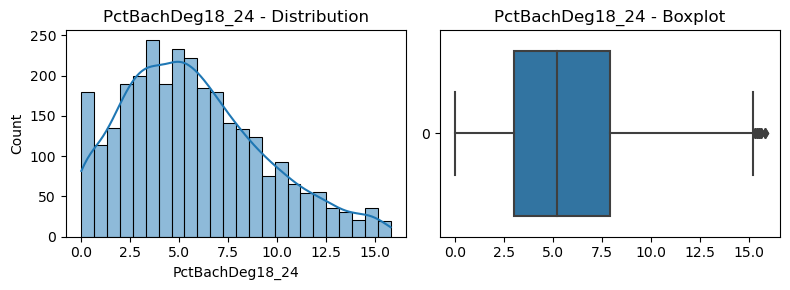

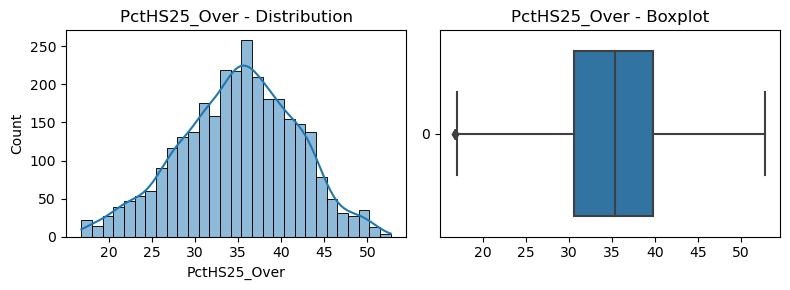

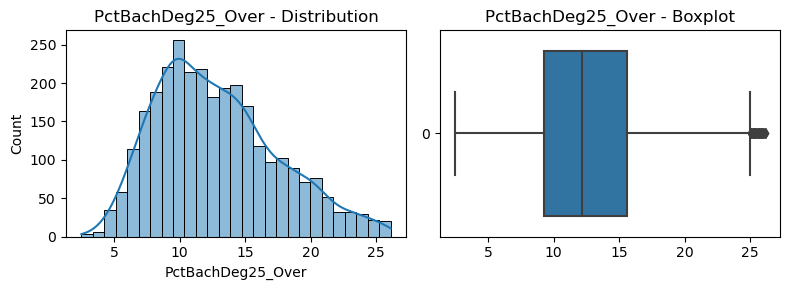

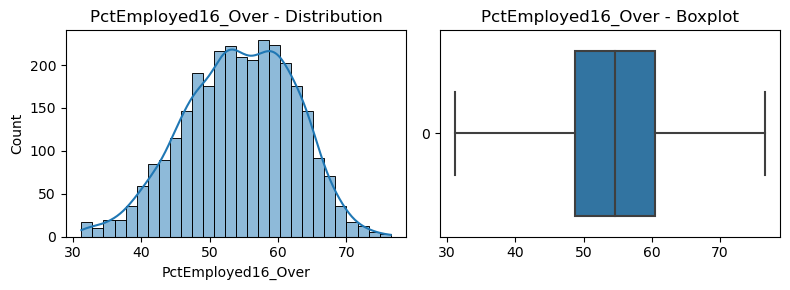

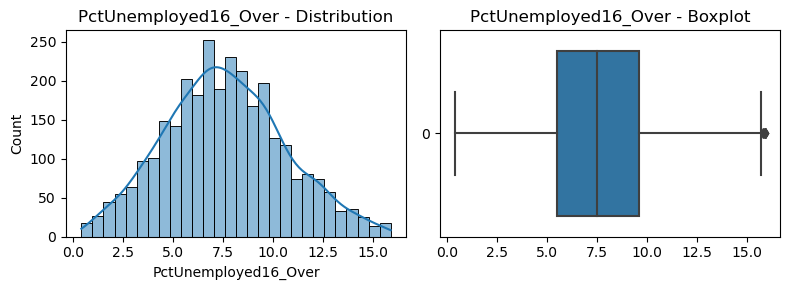

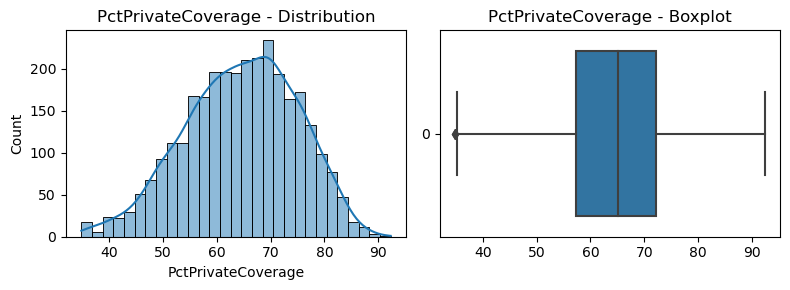

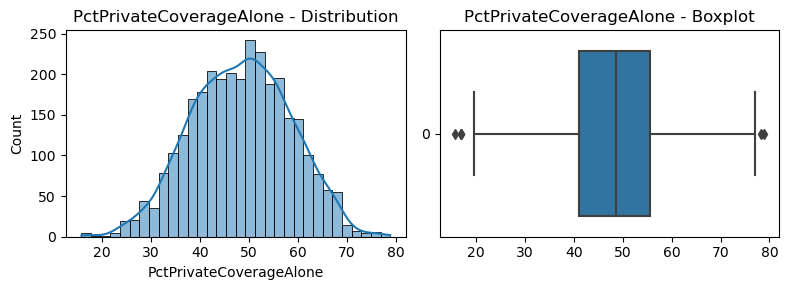

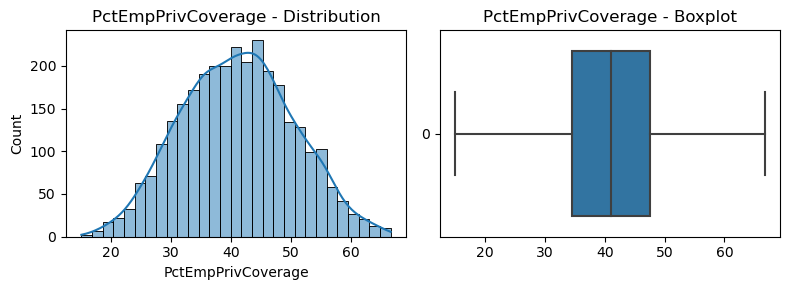

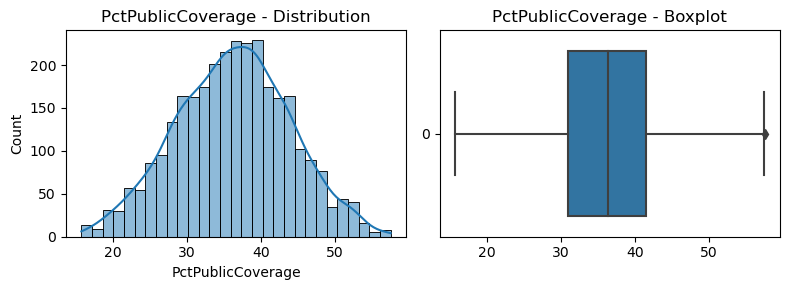

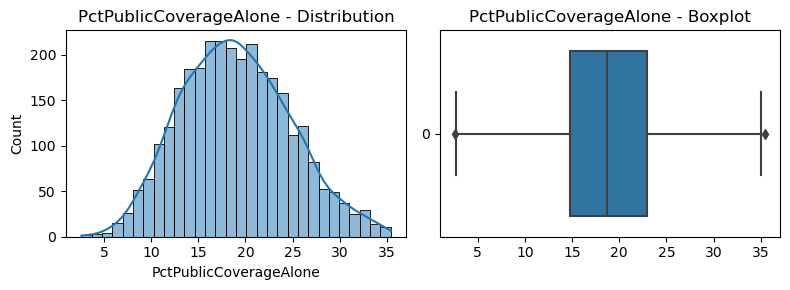

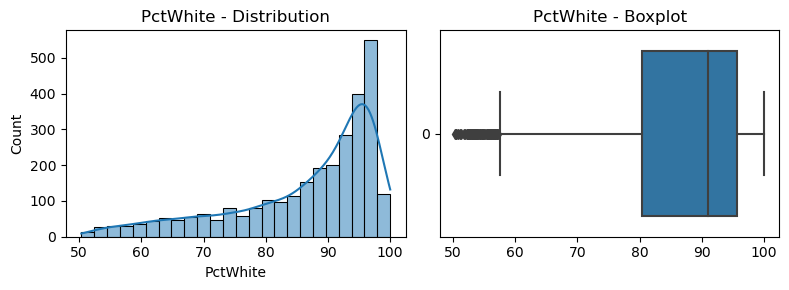

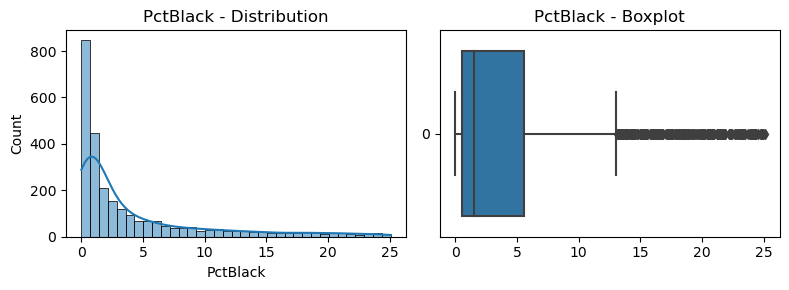

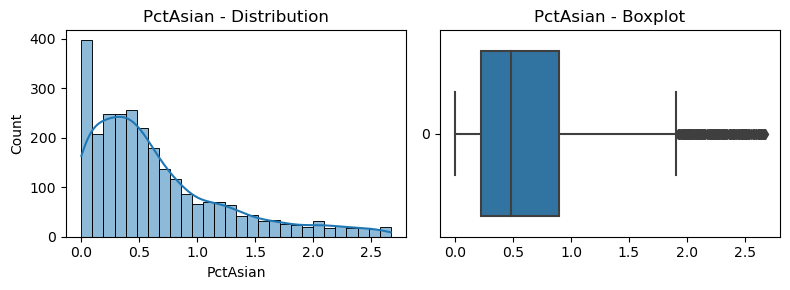

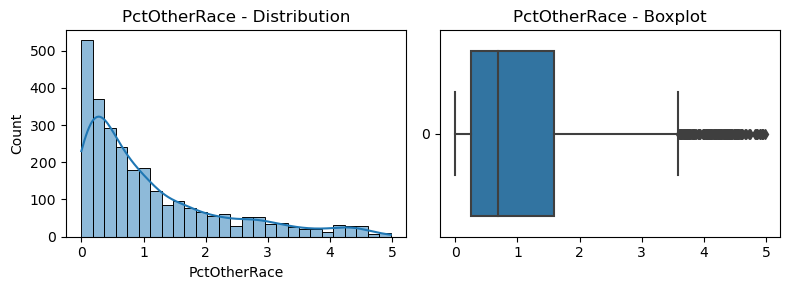

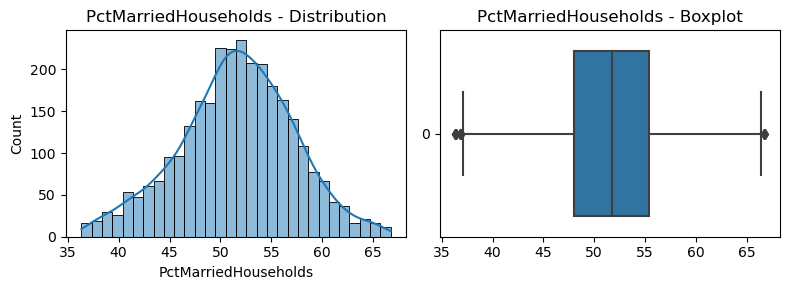

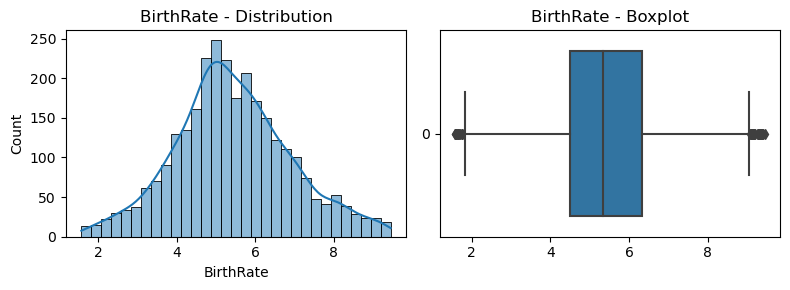

In [21]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

# Pridectors Selection 

## Part1 : Calculating Correlation

In [22]:
Selected_corr = DF.corr(method='pearson', numeric_only=True)#corr() function in pandas to calculate correlation coff.
Selected_corr['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.424369
povertyPercent             0.400301
incidenceRate              0.393332
PctHS25_Over               0.389953
PctPublicCoverage          0.376922
PctUnemployed16_Over       0.367553
PctHS18_24                 0.260077
PctBlack                   0.140109
PctNoHS18_24               0.116030
avgDeathsPerYear           0.070902
AvgHouseholdSize           0.068959
MedianAgeFemale            0.034494
MedianAge                  0.022105
MedianAgeMale              0.001067
BirthRate                 -0.020784
studyPerCap               -0.035002
avgAnnCount               -0.045015
PctWhite                  -0.094762
PctAsian                  -0.116630
PctSomeCol18_24           -0.127161
popEst2015                -0.127569
PctOtherRace              -0.136878
PctBachDeg18_24           -0.225769
PercentMarried            -0.243139
PctMarriedHouseholds      -0.251383
PctEmpPrivCoverage        -0.254927
PctPrivateCoverageAlone   -0

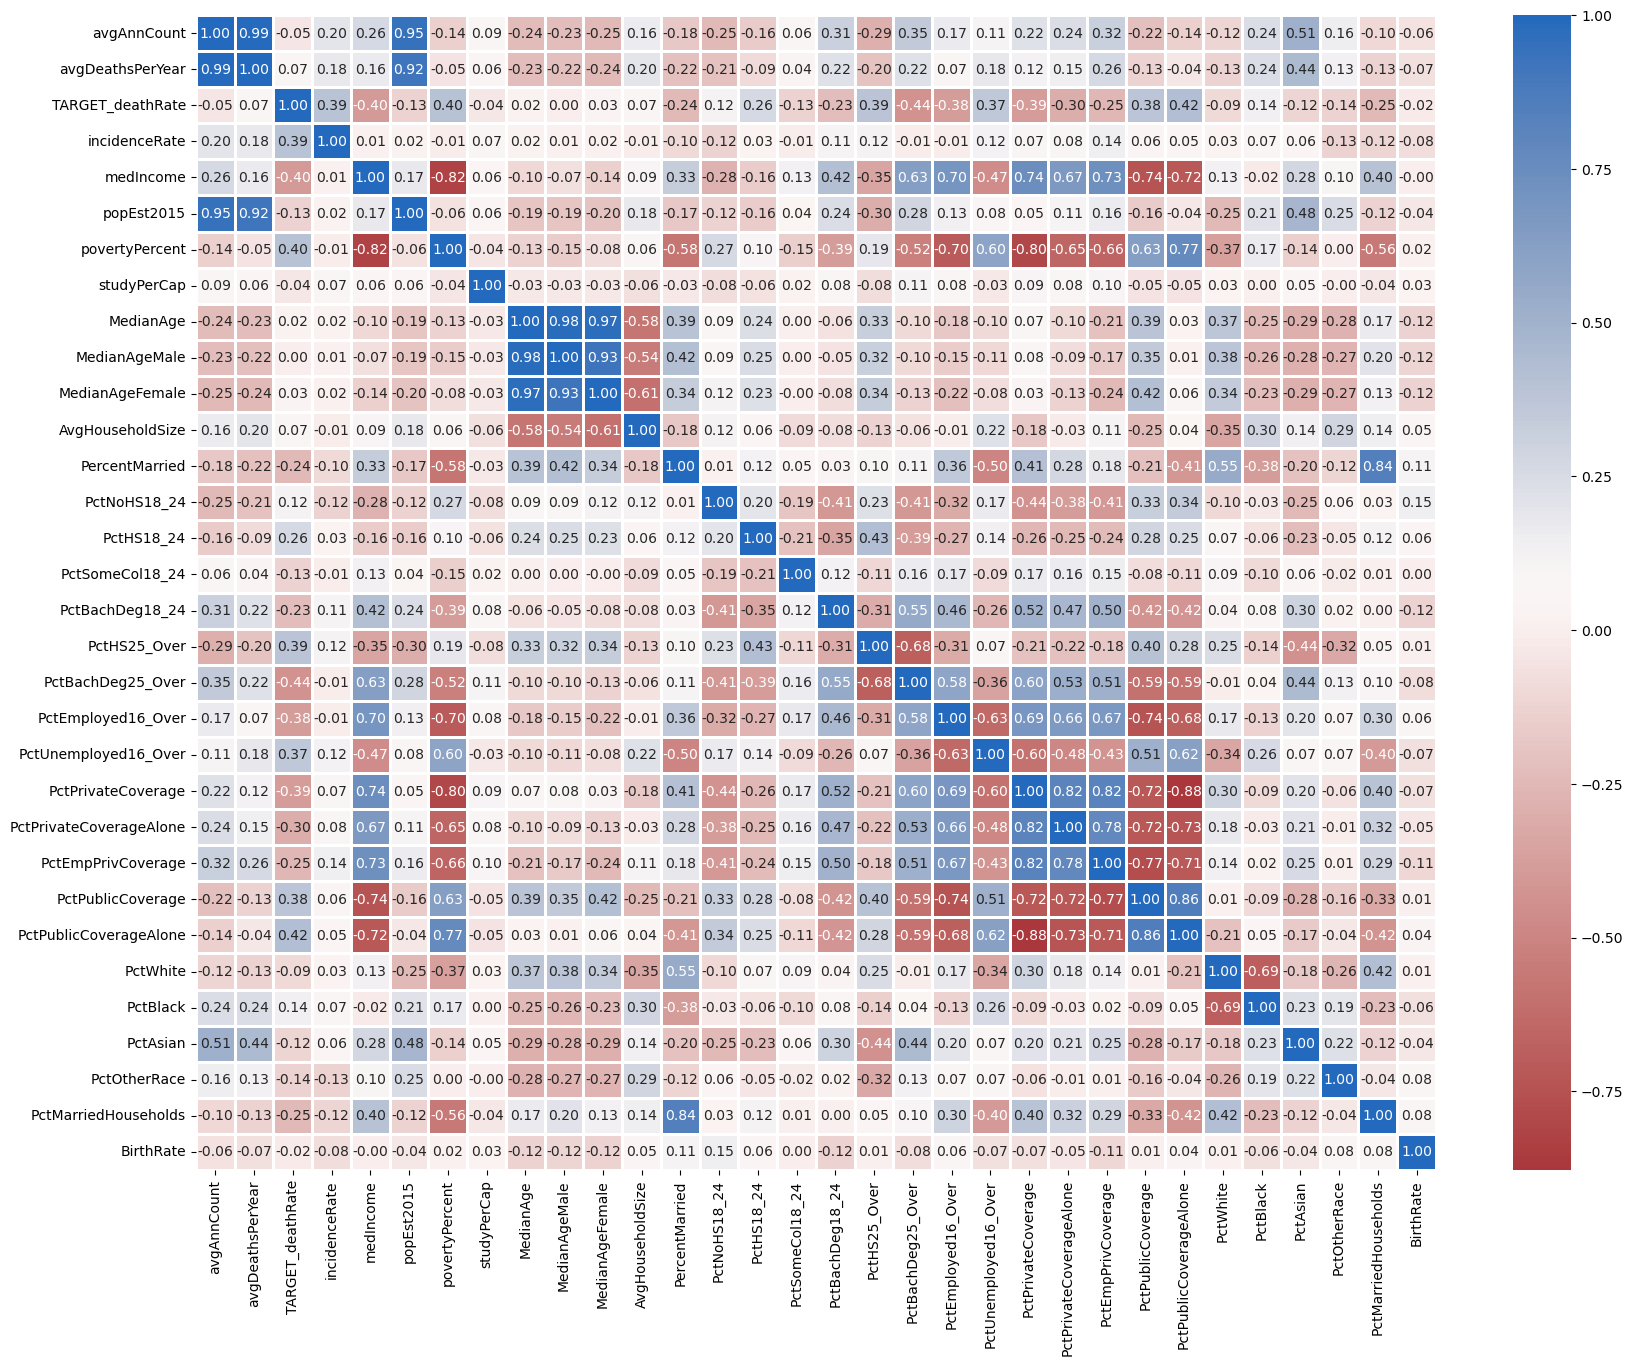

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(DF.corr(numeric_only=True), cmap='vlag_r', annot=True, fmt='.2f', linewidths=1) # heatmap() function in pandas to show features correlations togther
plt.show()

<Axes: >

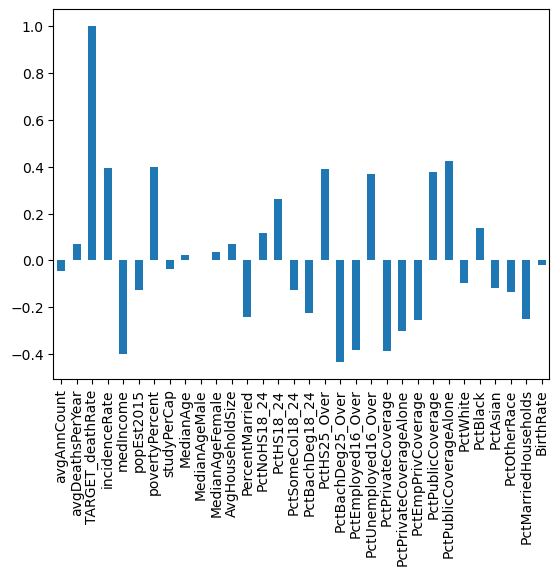

In [24]:
Selected_corr['TARGET_deathRate'].plot(kind='bar') # plotting corr. between our target and the all available features

## Part2 : Selection

we will take feature that has corr. coff. > 0.3 to avoide weak relationships


In [25]:
# List of selected columns from the Data Frame including out target
selected = ['TARGET_deathRate','incidenceRate', 'medIncome', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctPublicCoverage',
                                'PctPublicCoverageAlone']


# List of selected Features only from the Data Frame
selected_features_only = ['incidenceRate', 'medIncome', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctPublicCoverage',
                                'PctPublicCoverageAlone']

# Appling Statstics on Selected data

In [26]:
# New Data Frame after selection
selected_DF = DF[selected]

# Calculating corr
Selected_corr = DF[selected].corr(method='pearson', numeric_only=True)

target_corr = Selected_corr['TARGET_deathRate']
new_target_table = target_corr[selected].sort_values(ascending=False)

print(" "*10 + "Data Correlation\n")
print(new_target_table)
print("-"*100)

# Calculating Mean
print(" "*10 + "Data mean\n")
features_mean = DF[selected].mean()
print(features_mean)
print("-"*100)

# Calculating Median
print(" "*10 + "Data median\n")
features_median = DF[selected].median()
print(features_median)
print("-"*100)

# Calculating mode
print(" "*10 + "Data mode\n")
features_mode = DF[selected].mode()
print(features_mode) # will have multiple rows because maybe there is more than one mode for each feature
print("-"*100)

# Calculating STD
print(" "*10 + "Data Standerd Deviation\n")
features_std = DF[selected].std()
print(features_std)
print("-"*100)

# Calculating ranges
print(" "*10 + "Features ranges\n")
features_range = DF[selected].mean()
for column in selected:
    max = DF[column].max()
    min = DF[column].min()
    features_range[column] = "(" + str(min) + " - " + str(max) + ")"
print(features_range)


          Data Correlation

TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.424369
povertyPercent             0.400301
incidenceRate              0.393332
PctHS25_Over               0.389953
PctPublicCoverage          0.376922
PctUnemployed16_Over       0.367553
PctPrivateCoverageAlone   -0.302710
PctEmployed16_Over        -0.381089
PctPrivateCoverage        -0.386774
medIncome                 -0.400594
PctBachDeg25_Over         -0.435021
Name: TARGET_deathRate, dtype: float64
----------------------------------------------------------------------------------------------------
          Data mean

TARGET_deathRate             177.997687
incidenceRate                450.403379
medIncome                  45532.200684
povertyPercent                16.413600
PctHS25_Over                  34.992905
PctBachDeg25_Over             12.817470
PctEmployed16_Over            54.372165
PctUnemployed16_Over           7.596744
PctPrivateCoverage            64.586814
PctPrivateCoverageA

# Standardization

In [27]:
selected_DF_before_normalization = selected_DF.copy()
for feature in selected:
    selected_DF[feature] = selected_DF[feature] - features_mean[feature]
    selected_DF[feature] = selected_DF[feature] / features_std[feature]

selected_DF.head()

C:\Users\mohamed ibrahim\AppData\Local\Temp\ipykernel_1592\981777279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_DF[feature] = selected_DF[feature] - features_mean[feature]
C:\Users\mohamed ibrahim\AppData\Local\Temp\ipykernel_1592\981777279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_DF[feature] = selected_DF[feature] / features_std[feature]


TARGET_deathRate  incidenceRate  medIncome  povertyPercent  PctHS25_Over  \
0         -0.523018       0.876995   1.744947       -0.919075     -1.749148   
1         -0.666774      -0.863789   0.276662        0.385428     -1.333846   
2         -0.131684      -2.241723   0.406847       -0.319709     -0.888880   
3          0.670951      -0.445288  -0.137457        0.121001     -0.503243   
4         -1.341626      -2.232819   0.471566       -0.689906     -0.236263   

   PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
0           1.461239           -0.308859              0.133871   
1           2.129108            0.190880              0.067476   
2           0.685649           -1.058468             -0.198104   
3          -0.757809           -0.758625              1.494965   
4           0.470208           -0.771118             -0.928447   

   PctPrivateCoverage  PctPrivateCoverageAlone  PctPublicCoverage  \
0            1.019919                      NaN          -0.435614   
1            0.544554                 0.535800          -0.670682   
2           -0.086033                -0.489931           0.765844   
3           -0.600204                -0.808605           1.183743   
4           -0.289761                -0.450097           1.013972   

   PctPublicCoverageAlone  
0               -0.868389  
1               -0.643088  
2                0.362100  
3                1.038002  
4                0.639393

# Visualization of Features' distributions

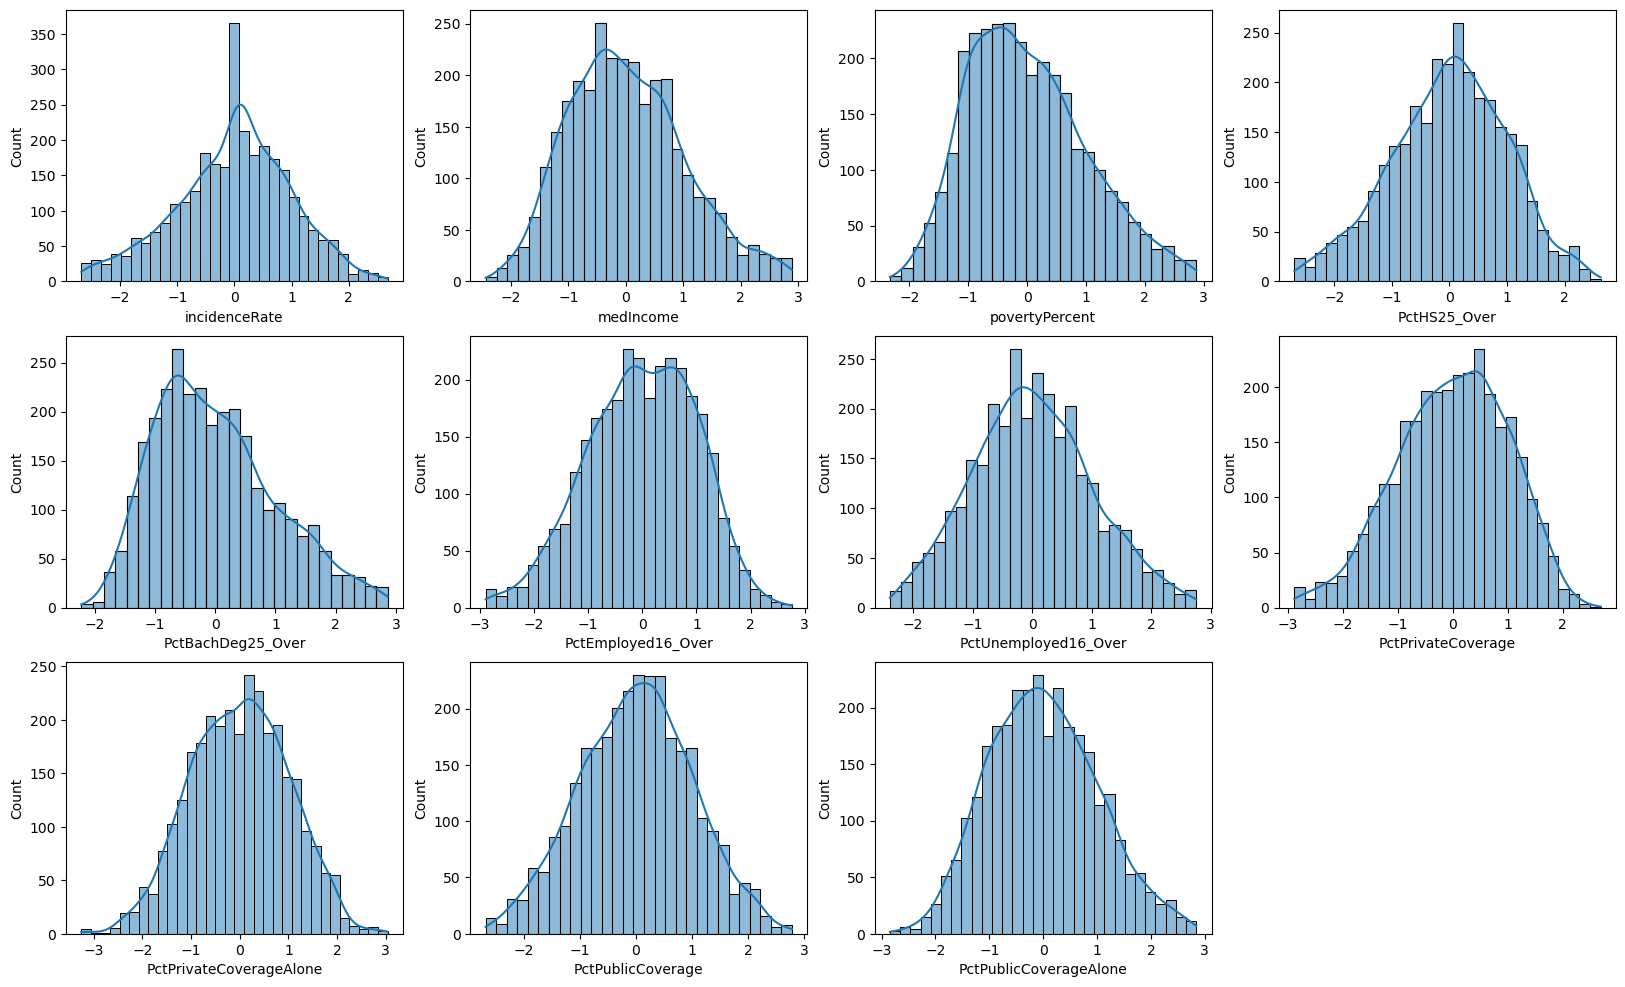

In [28]:
selected_DF = selected_DF.ffill()
selected_DF["PctPrivateCoverageAlone"] = selected_DF["PctPrivateCoverageAlone"].fillna(1) #🧐🧐
fig, ax = plt.subplots(3, 4)
fig.set_figwidth(20)
fig.set_figheight(12)
z = 0   
for i in range(3):
    for j in range(4):
        if z == 11:
            break
        column = selected_features_only[z]
        sns.histplot(data=selected_DF[column], kde=True, ax=ax[i, j])
        z += 1
fig.delaxes(ax[2][3])
plt.show()

# Linear regression model for each feature

## From Scratch

This code performs linear regression analysis to examine the relationship between the target variable ('TARGET_deathRate') and each feature in the dataset.  
It calculates the regression coefficients (intercept and slope) and plots the data points along with the regression line for visualization.  
The correlation between each feature and the target variable is assessed, and the regression equation is used to make predictions.

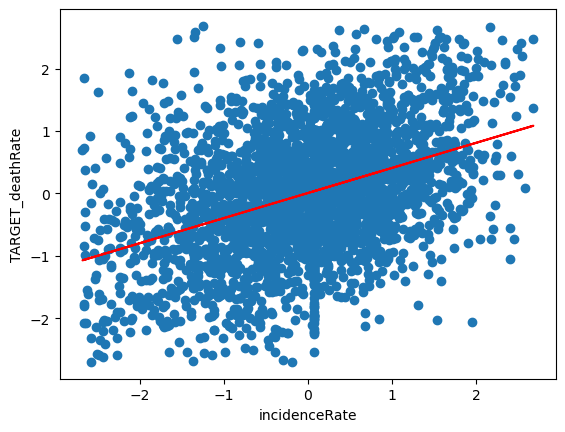

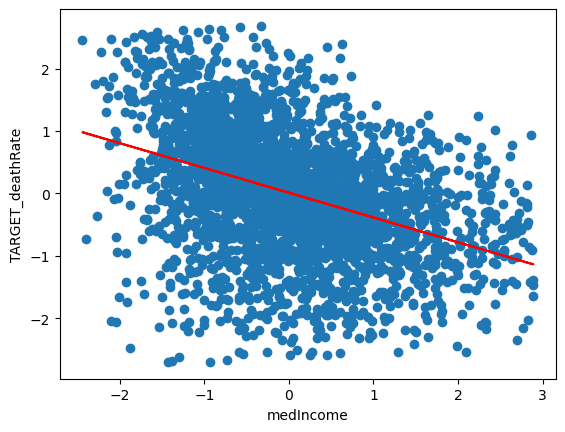

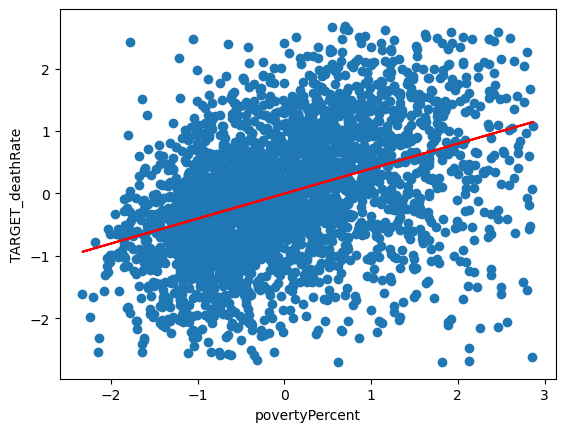

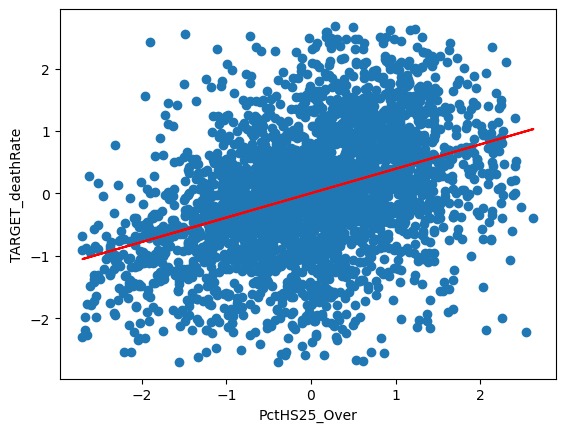

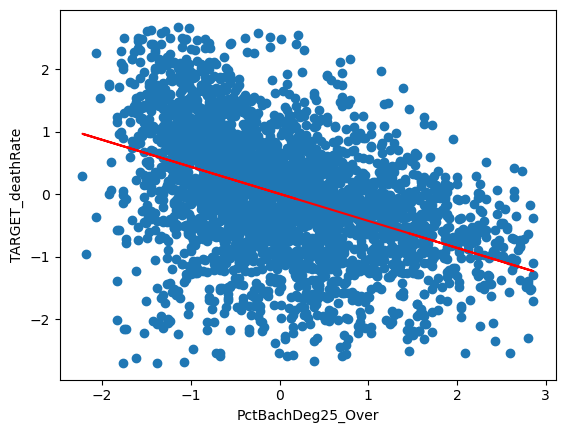

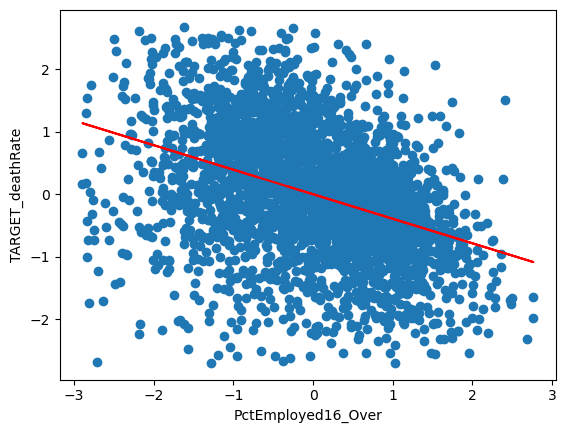

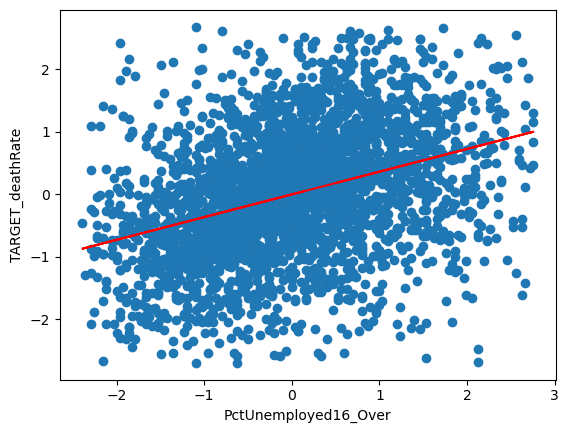

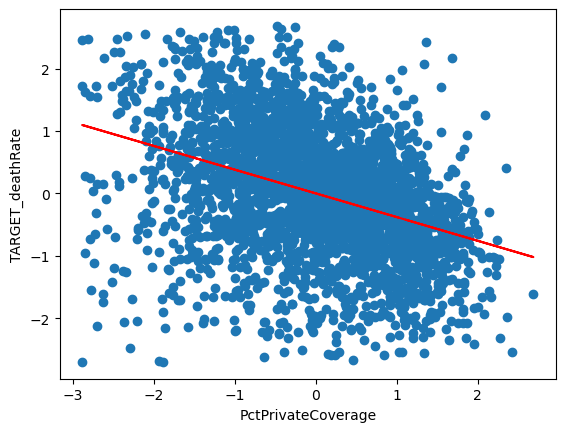

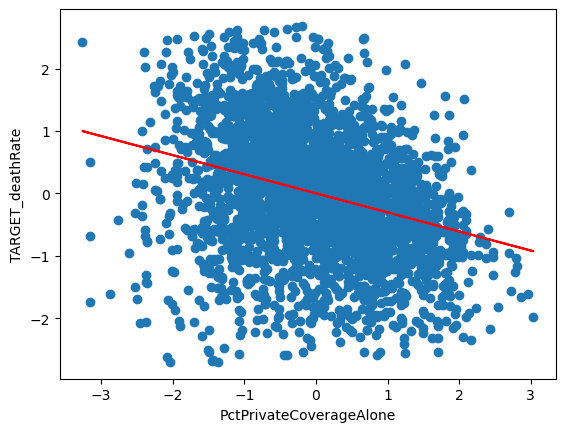

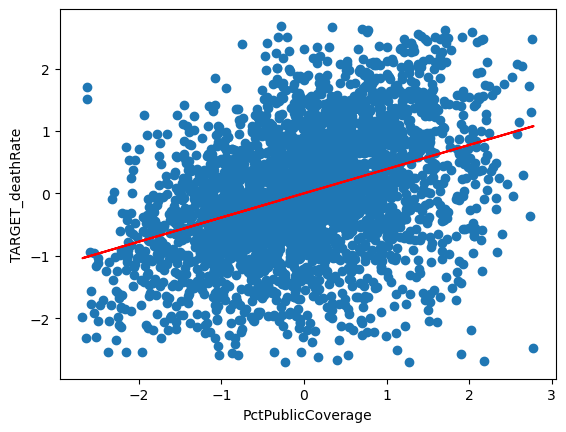

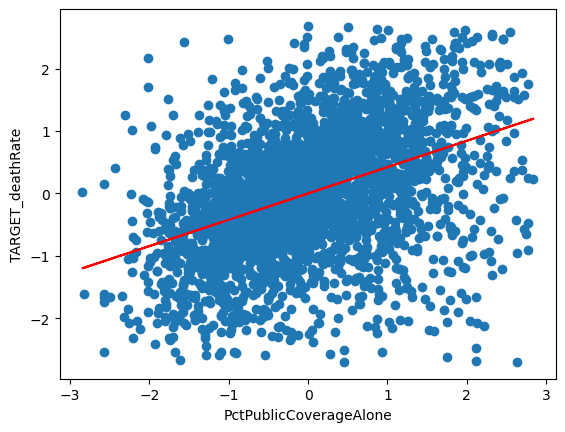

In [29]:
# This code is performing linear regression analysis to explore the relationship between the target variable 'TARGET_deathRate'
# and each feature in the dataset. Let's go through it step by step.

# First, we fill any missing values in the target variable 'TARGET_deathRate' and assign it to 'Target'.
Target = selected_DF['TARGET_deathRate'].ffill()

# Next, calculate the length of the 'Target' variable, which represents the number of data points.
length = Target.count()

# Then, calculate the mean value of the 'Target' variable.
Target_mean = Target.sum() / length

# an empty dictionary 'RCs' to store the regression coefficients for each feature.
RCs = {}

# Now, we iterate over each feature in the 'selected' list.
for feature in selected:
    # We skip the feature if it is the target variable itself.
    if feature == "TARGET_deathRate":
        continue
    
    # We fill any missing values in the current feature and assign it to 'x'.
    x = selected_DF[feature].ffill()

    # We calculate the mean value of the current feature.
    x_mean = x.sum() / x.count()
    
    # Next, we calculate the correlation coefficient between the current feature and the target variable.
    S_xy = ((x - x_mean)*(Target - Target_mean)).sum() / (length - 1)
    S_x_sq = ((x - x_mean) ** 2).sum() / (length - 1)
    b1 = S_xy / S_x_sq
    
    # We calculate the intercept 'bo' using the mean values of the feature and the target variable.
    bo = Target_mean - b1 * x_mean
    
    # We store the intercept and slope (regression coefficient) in the 'RCs' dictionary.
    RCs[feature] = [bo, b1]
    
    # We predict the target variable using the regression equation and the current feature.
    y_pred = [bo + b1 * xi for xi in x]
    
    # Finally, we create a scatter plot of the data points and overlay the regression line.
    plt.scatter(x, selected_DF['TARGET_deathRate'])
    plt.plot(x, y_pred, color='red')
    plt.xlabel(feature)
    plt.ylabel('TARGET_deathRate')
    plt.show()


## Using python packages

This code compares the regression coefficients obtained in the previous step (using the correlation method) with the coefficients calculated using the standard Python libraries.  
It utilizes the LinearRegression class from the scikit-learn library to perform the comparison.  
For each feature, it prints the regression coefficients obtained earlier and the coefficients obtained using the stats.linregress() function from the scipy library.  

In [30]:
# This code is using the linear regression model from the scikit-learn library to compare the regression coefficients obtained 
# in the previous step with the coefficients calculated using the standard Python libraries.

# We create an instance of the LinearRegression class from the scikit-learn library.
reg = LinearRegression()

# Next, we iterate over each feature in the 'selected' list.
for feature in selected:
    # We skip the feature if it is the target variable itself.
    if feature == "TARGET_deathRate":
        continue
    
    # We print the regression coefficients obtained in the previous step.
    print(f"Regression coefficients for {feature}: bo = {RCs[feature][0]}, b1 = {RCs[feature][1]}")
    
    # We use the stats.linregress() function from the scipy library to calculate the regression coefficients 
    # using the standard Python libraries.
    slope, intercept, r_value, p_value, std_err = stats.linregress(selected_DF[feature], selected_DF["TARGET_deathRate"])
    
    # We print the regression coefficients obtained using the standard Python libraries.
    print(f"Regression coefficients using standard Python libraries: bo = {intercept}, b1 = {slope}")
    
    # If the current feature is "PctPublicCoverageAlone", we break the loop.
    if feature == "PctPublicCoverageAlone":
        break
    
    # We print a line of dashes for visual separation between different features.
    print("-" * 100)


Regression coefficients for incidenceRate: bo = 0.007010370150941166, b1 = 0.4020450378823925
Regression coefficients using standard Python libraries: bo = 0.007010370150941163, b1 = 0.40204503788239226
----------------------------------------------------------------------------------------------------
Regression coefficients for medIncome: bo = 0.011530858183162542, b1 = -0.3970150205858868
Regression coefficients using standard Python libraries: bo = 0.011530858183162539, b1 = -0.3970150205858866
----------------------------------------------------------------------------------------------------
Regression coefficients for povertyPercent: bo = -0.002779418319073282, b1 = 0.40009280798515856
Regression coefficients using standard Python libraries: bo = -0.0027794183190732813, b1 = 0.40009280798515845
----------------------------------------------------------------------------------------------------
Regression coefficients for PctHS25_Over: bo = 0.0037440196474077822, b1 = 0.391176963

# Multivariable regression

## Model

This code uses the LinearRegression class from the scikit-learn library to fit a linear regression model.  
It then calculates the mean of the selected features in the original DataFrame and retrieves the regression coefficients and intercept from the trained model.  
The code iterates over the coefficients and their corresponding features, printing each regression coefficient and adding the term to the regression equation string.  
The 'res' DataFrame is updated to store the predictor names as 'x1', 'x2', etc. Finally, the code prints the updated 'res' DataFrame and the final regression equation. 

In [31]:
# This code fits a linear regression model using the scikit-learn library and prints the regression equation and coefficients.
# We create an instance of the LinearRegression class from the scikit-learn library.
model = LinearRegression()

# We fit the linear regression model using the selected features as predictors and the 'TARGET_deathRate' column as the target variable.
model.fit(selected_DF[selected_features_only], selected_DF['TARGET_deathRate'])

# We calculate the mean of the selected features in the original DataFrame.
res = DF[selected_features_only].mean()

# We retrieve the regression coefficients and the intercept from the trained model.
coefficients = model.coef_
intercept = model.intercept_

# We initialize an empty string to store the regression equation.
eq = ""

# We iterate over the coefficients and their corresponding features.
for i, coefficient in enumerate(coefficients):
    # We print the regression coefficient for each predictor.
    print(f"Regression coefficient of predictor {selected_features_only[i]}: {coefficient:.4f}")
    
    # We add the term to the regression equation string.
    eq += str(round(coefficient, 4)) + " * x" + str(i + 1) + " + "
    
    # We update the 'res' DataFrame to store the predictor names as 'x1', 'x2', etc.
    res[selected_features_only[i]] = "x" + str(i + 1)

print(f"y-intercept = {intercept}")

# We add the intercept term to the regression equation string.
eq += str(round(intercept, 4))

# We print the updated 'res' DataFrame, which now contains the predictor names as 'x1', 'x2', etc.
print(res)

# We print the final regression equation.
print(f"Model equation: {eq}")


Regression coefficient of predictor incidenceRate: 0.3717
Regression coefficient of predictor medIncome: -0.0789
Regression coefficient of predictor povertyPercent: 0.0930
Regression coefficient of predictor PctHS25_Over: 0.2291
Regression coefficient of predictor PctBachDeg25_Over: -0.0744
Regression coefficient of predictor PctEmployed16_Over: -0.0443
Regression coefficient of predictor PctUnemployed16_Over: 0.1036
Regression coefficient of predictor PctPrivateCoverage: -0.1312
Regression coefficient of predictor PctPrivateCoverageAlone: 0.0219
Regression coefficient of predictor PctPublicCoverage: -0.0991
Regression coefficient of predictor PctPublicCoverageAlone: 0.0650
y-intercept = 0.007378681611590625
incidenceRate               x1
medIncome                   x2
povertyPercent              x3
PctHS25_Over                x4
PctBachDeg25_Over           x5
PctEmployed16_Over          x6
PctUnemployed16_Over        x7
PctPrivateCoverage          x8
PctPrivateCoverageAlone     x9
Pct

## Prediction function

In [32]:
# def y_hat(row):
#     np.array([row])
#     np.array([coefficients])
#     return (np.multiply(row , coefficient)).sum(axis=0)
     

In [33]:
# y_hat(selected_DF.iloc(0))
# print(y_hat)

# Hypothesis testing

## Using Shapiro-Wilk test

This code performs a Shapiro-Wilk test to assess the normality of the distributions for each feature in the selected DataFrame.  
It prints the null and alternative hypotheses and then iterates over each feature. For each feature, it calculates the Shapiro-Wilk test statistic and p-value.  
It compares the p-value against a predefined list of alpha values (significance levels) and determines whether to reject or fail to reject the null hypothesis based on the p-value.  

In [34]:
# This code performs a Shapiro-Wilk test to assess the normality of the distributions for each feature in the selected DataFrame.

# The Shapiro-Wilk test is a statistical test used to assess whether a given sample of data follows a normal distribution. 
# It offers several benefits in analyzing data:

    # 1. Normality Assessment:
    #    The Shapiro-Wilk test provides a formal statistical procedure to determine if a sample comes from a normally distributed population. 
    #    This is important because many statistical analyses and models assume the data to be normally distributed. 
    #    By conducting the Shapiro-Wilk test, we can evaluate the normality assumption and make informed decisions about further analyses.

    # 2. Sensitivity to Departures from Normality:
    #    The Shapiro-Wilk test is known for its sensitivity to departures from normality. 
    #    It performs well even with small sample sizes, making it suitable for assessing normality in various scenarios. 
    #    It can detect deviations from normality, such as skewness or kurtosis, which might impact the validity of statistical tests or model assumptions.

    # 3. Significance Level Evaluation:
    #    The Shapiro-Wilk test provides a p-value that indicates the statistical significance of the test result. 
    #    By comparing the p-value to a predetermined significance level (e.g., 0.05), we can make decisions about whether to reject or fail to reject the null hypothesis. 
    #    This allows us to quantitatively assess the normality of the data and draw conclusions based on statistical evidence.

    # 4. Non-parametric Alternative:
    #    The Shapiro-Wilk test is a non-parametric test, meaning it does not rely on assumptions about the parameters of the underlying distribution. 
    #    It is a distribution-free test, making it suitable for a wide range of data types and distributions.

    # 5. Versatility:
    #    The Shapiro-Wilk test can be applied to both small and large sample sizes and works well with univariate data. 
    #    It is widely used in various fields, including statistics, data analysis, and research, to assess the normality of data.

print("Null hypothesis(Ho): the distribution is normal.")
print("Alternative hypothesis(Ha): the distribution is not normal.\n")

# Iterate over each feature in the selected DataFrame.
for feature in selected:
    
    # Perform the Shapiro-Wilk test on the feature.
    statistic, p_value = stats.shapiro(selected_DF[feature])
    
    # Define a list of alpha values for significance levels.
    alpha = [0.05, 0.1, 0.15]
    
    # Iterate over each alpha value.
    for value in alpha:
        if p_value > value:
            # If the p-value is greater than the alpha value, fail to reject the null hypothesis.
            print(f"The distribution of {feature} is likely normal with a significance level of {value}. Fail to reject the null hypothesis.")
        else:
            # If the p-value is less than or equal to the alpha value, reject the null hypothesis.
            print(f"The distribution of {feature} is not likely normal with a significance level of {value}. Reject the null hypothesis.")
    
    if feature == "PctPublicCoverageAlone":
        break
    
    print("-" * 100)


Null hypothesis(Ho): the distribution is normal.
Alternative hypothesis(Ha): the distribution is not normal.

The distribution of TARGET_deathRate is not likely normal with a significance level of 0.05. Reject the null hypothesis.
The distribution of TARGET_deathRate is not likely normal with a significance level of 0.1. Reject the null hypothesis.
The distribution of TARGET_deathRate is not likely normal with a significance level of 0.15. Reject the null hypothesis.
----------------------------------------------------------------------------------------------------
The distribution of incidenceRate is not likely normal with a significance level of 0.05. Reject the null hypothesis.
The distribution of incidenceRate is not likely normal with a significance level of 0.1. Reject the null hypothesis.
The distribution of incidenceRate is not likely normal with a significance level of 0.15. Reject the null hypothesis.
--------------------------------------------------------------------------

## Using Yeo-Johnson transformation & Shapiro-Wilk test

This code performs a Shapiro-Wilk test on the transformed data using the Yeo-Johnson transformation to assess the normality of the distributions for each feature in the selected DataFrame.  
It prints the null and alternative hypotheses and then iterates over each feature. For each feature, it applies the Yeo-Johnson transformation to the data, calculates the Shapiro-Wilk test statistic  and p-value on the transformed data, and compares the p-value against a predefined list of alpha values (significance levels).  
It determines whether to reject or fail to reject the null hypothesis based on the p-value. 

In [35]:
# The Yeo-Johnson transformation used in this code offers several benefits for assessing the normality of distributions:

    # 1. Handles both positive and negative values:
    #    Unlike some other transformations (e.g., Box-Cox), the Yeo-Johnson transformation can handle datasets that contain negative values.

    # 2. Supports zero and negative values:
    #    The Yeo-Johnson transformation can handle datasets that include zero and negative values, which makes it more flexible for a wider range of data distributions.

    # 3. Determines the optimal transformation:
    #    The Yeo-Johnson transformation estimates the optimal transformation parameter (lambda) for each feature, providing a more customized approach to address the specific characteristics of each distribution.

    # 4. Preserves interpretability:
    #    The Yeo-Johnson transformation maintains interpretability of the data since it allows for both positive and negative transformations, ensuring meaningfulness of the transformed values.

    # By using the Yeo-Johnson transformation, this code enables a more robust assessment of the normality assumption by accommodating a broader range of data distributions and handling both positive and negative values appropriately.

    # This code performs a Shapiro-Wilk test on the transformed data using the Yeo-Johnson transformation to assess the normality of the distributions for each feature in the selected DataFrame.

print("The null hypothesis is that the distribution is normal.")
print("The alternative hypothesis is that the distribution is not normal.\n")

# Iterate over each feature in the selected DataFrame.
for feature in selected:

    # Apply the Yeo-Johnson transformation to the feature.
    transformed_data, lambda_value = stats.yeojohnson(selected_DF[feature])

    # Perform the Shapiro-Wilk test on the transformed data.
    statistic, p_value = stats.shapiro(transformed_data)

    # Define a list of alpha values for significance levels.
    alpha = [0.05, 0.1, 0.15]

    # Iterate over each alpha value.
    for value in alpha:
        if p_value > value:
            # If the p-value is greater than the alpha value, fail to reject the null hypothesis.
            print(f"The distribution of {feature} is likely normal with a significance level of {value}. Fail to reject the null hypothesis.")
        else:
            # If the p-value is less than or equal to the alpha value, reject the null hypothesis.
            print(f"The distribution of {feature} is not likely normal with a significance level of {value}. Reject the null hypothesis.")

    if feature == "PctPublicCoverageAlone":
        break

    print("-" * 100)


The null hypothesis is that the distribution is normal.
The alternative hypothesis is that the distribution is not normal.

The distribution of TARGET_deathRate is not likely normal with a significance level of 0.05. Reject the null hypothesis.
The distribution of TARGET_deathRate is not likely normal with a significance level of 0.1. Reject the null hypothesis.
The distribution of TARGET_deathRate is not likely normal with a significance level of 0.15. Reject the null hypothesis.
----------------------------------------------------------------------------------------------------
The distribution of incidenceRate is not likely normal with a significance level of 0.05. Reject the null hypothesis.
The distribution of incidenceRate is not likely normal with a significance level of 0.1. Reject the null hypothesis.
The distribution of incidenceRate is not likely normal with a significance level of 0.15. Reject the null hypothesis.
------------------------------------------------------------

# Using Modified Box-Cox test

In [36]:
# Why Box-Cox:
    # The Box-Cox transformation offers several benefits when analyzing data:

    # 1. Normalize Skewed Distributions:
    #    The Box-Cox transformation is effective in normalizing skewed distributions. It can transform the data to a more symmetric shape, reducing the impact of outliers and extreme values. This is particularly useful when working with data that violates the assumption of normality in statistical analyses.

    # 2. Improve Linear Relationship:
    #    By transforming the data using Box-Cox, it can help improve the linearity of the relationship between variables. This is beneficial when performing linear regression or other analyses that assume a linear relationship between variables.

    # 3. Parameter Estimation:
    #    The Box-Cox transformation estimates a parameter (lambda) that determines the type of transformation applied to the data. The optimal lambda value is chosen to maximize the likelihood of the transformed data. This ensures that the transformation is tailored to the specific characteristics of the data, potentially leading to better results compared to other generic transformations.

    # 4. Versatility:
    #    The Box-Cox transformation is versatile and can handle different types of data. It can be applied to positive, negative, or zero values, making it suitable for a wide range of distributions.

    # 5. Simplify Interpretation:
    #    Transforming the data using Box-Cox can simplify interpretation by making the transformed values more interpretable or meaningful in certain contexts. For example, exponentiated Box-Cox transformed data can represent percent changes, making the results more easily understandable.

    # 6. Statistical Testing:
    #    The Box-Cox transformation can be used in conjunction with statistical tests to assess normality or meet the assumptions of specific analyses. The transformed data can provide more reliable results when the data does not meet the assumptions of the chosen statistical test.

    # Overall, the Box-Cox transformation is a powerful tool for data preprocessing, particularly when dealing with skewed data, improving linearity, and meeting the assumptions of statistical tests. It can help obtain more accurate and meaningful results in various analytical tasks.


# This code assesses the normality of the distributions of selected features using the Box-Cox transformation and the Shapiro-Wilk test.
# Here's an explanation of the code:

    # 1. Hypothesis testing:
    #    The code prints the null hypothesis and alternative hypothesis related to the distribution's normality.

    # 2. Looping through selected features:
    #    The code iterates over each feature in the 'selected' list.

    # 3. Box-Cox transformation:
    #    If the minimum value of the feature is negative, the code applies the Box-Cox transformation by adding the min value of the column to make all the values positive
    #    and a small positive value (0.0005) to git rid of 0s. Otherwise, the transformation is applied directly.

    # 4. Shapiro-Wilk test:
    #    The transformed data is then subjected to the Shapiro-Wilk test for normality. The test statistic and p-value are calculated.

    # 5. Significance levels and hypothesis evaluation:
    #    The code evaluates the normality of the distribution at different significance levels (0.05, 0.1, and 0.15). For each significance level, it checks if the p-value is greater than the significance level. If it is, the null hypothesis (distribution is normal) is not rejected. Otherwise, if the p-value is smaller than the significance level, the null hypothesis is rejected, indicating that the distribution is not likely normal.

    # 6. Loop control and printing:
    #    After evaluating each feature, the code checks if the current feature is equal to "PctPublicCoverageAlone" to determine if it should break the loop. It also prints a dashed line separator between features.

print("the null hypothesis is the distribution is normal")
print("the alternative hypothesis is the distribution is not normal\n")

# Iterate over each feature in the selected DataFrame.
for feature in selected:

    # Apply the Modified Box-Cox transformation to the feature if it has negative values.
    if selected_DF[feature].min() <= 0:
        transformed_data, lambda_value = stats.boxcox((selected_DF[feature] - selected_DF[feature].min() + .0005))
    else:
    # Otherwise apply the Box-cox transformation
        transformed_data, lambda_value = stats.boxcox(selected_DF[feature])

    # Perform the Shapiro-Wilk test on the transformed data.
    statistic, p_value = stats.shapiro(transformed_data)

    # Define a list of alpha values for significance levels.
    alpha = [0.05, .1, .15]
    for value in alpha:
        if p_value > value:
            # If the p-value is greater than the alpha value, fail to reject the null hypothesis.
            print(f"The distribution of {feature} is likely normal with significance level of {value}, Fail to reject the null hypothesis")
        else:
            # If the p-value is less than or equal to the alpha value, reject the null hypothesis.
            print(f"The distribution of {feature} is not likely normal with significance level of {value}, reject the null hypothesis")
            
    if feature == "PctPublicCoverageAlone":
        break
    print("-" * 100)

the null hypothesis is the distribution is normal
the alternative hypothesis is the distribution is not normal

The distribution of TARGET_deathRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of TARGET_deathRate is not likely normal with significance level of 0.15, reject the null hypothesis
----------------------------------------------------------------------------------------------------
The distribution of incidenceRate is not likely normal with significance level of 0.05, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.1, reject the null hypothesis
The distribution of incidenceRate is not likely normal with significance level of 0.15, reject the null hypothesis
------------------------------------------------------------------------------------------

## Part2 : Finding correlation between data features

### Adding a city & district columns to draw a plot for the average target death rate per year for each city

# Data Visualixatin

In [37]:
# for column in DF.columns:
#     if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
#         continue
#     fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
#     sns.histplot(data=DF[column], kde=True, ax=axes[0])
#     sns.boxplot(data=DF[column], ax=axes[1], orient='h')
#     axes[0].set_title(f'{column} - Distribution')
#     axes[1].set_title(f'{column} - Boxplot')
#     plt.tight_layout()
#     plt.show()